In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-06T15:10:23.233139+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

pandas    : 2.2.3
seaborn   : 0.13.2
teeplot   : 1.4.2
matplotlib: 3.9.2
numpy     : 2.1.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-05-vanillasimplesingle-mut-screen"
teeplot_subdir


'2025-05-05-vanillasimplesingle-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/svme2/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
df["tb_stat"].unique()


['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']
Categories (7, object): ['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']

In [10]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [11]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=2_000, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 1080/1080 [01:53<00:00,  9.55it/s]


In [12]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


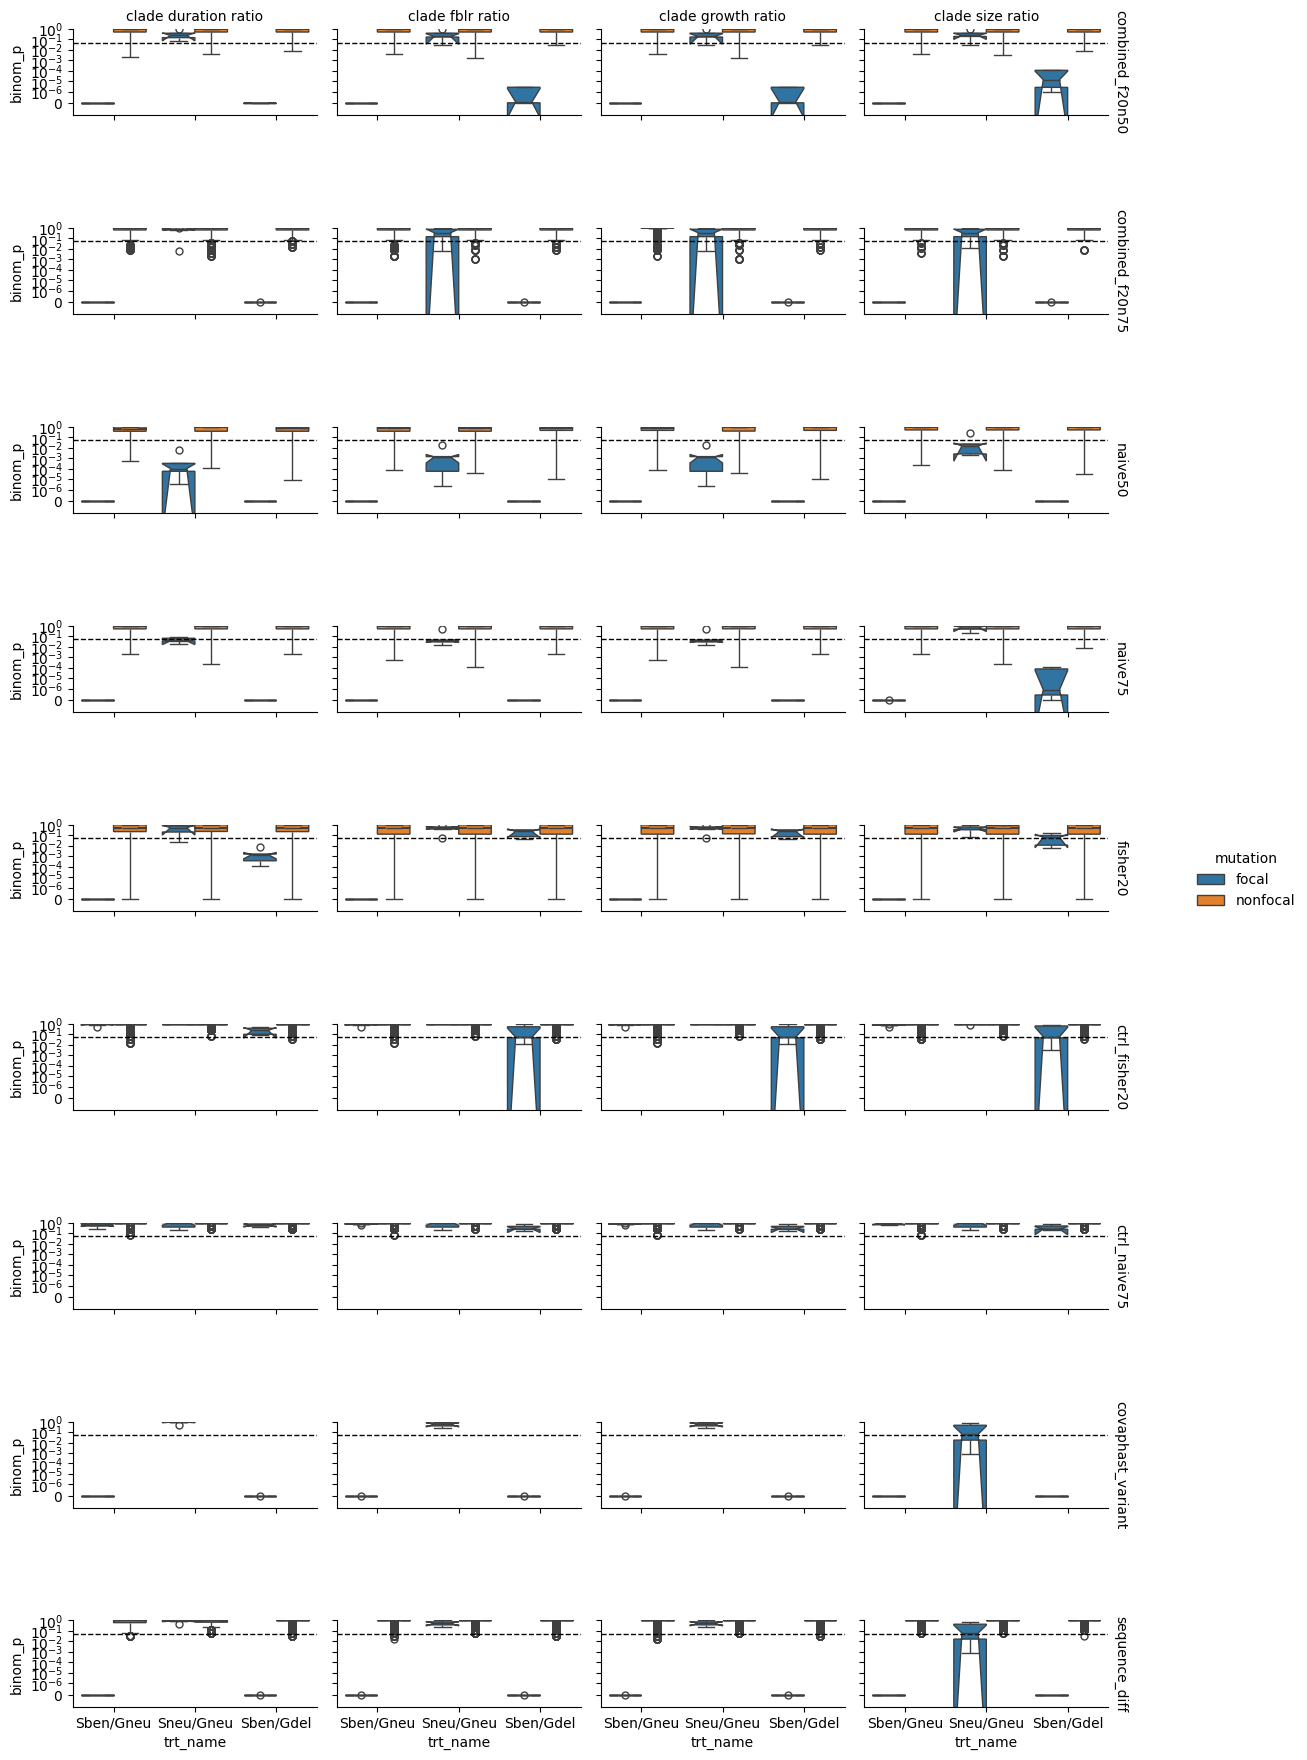

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


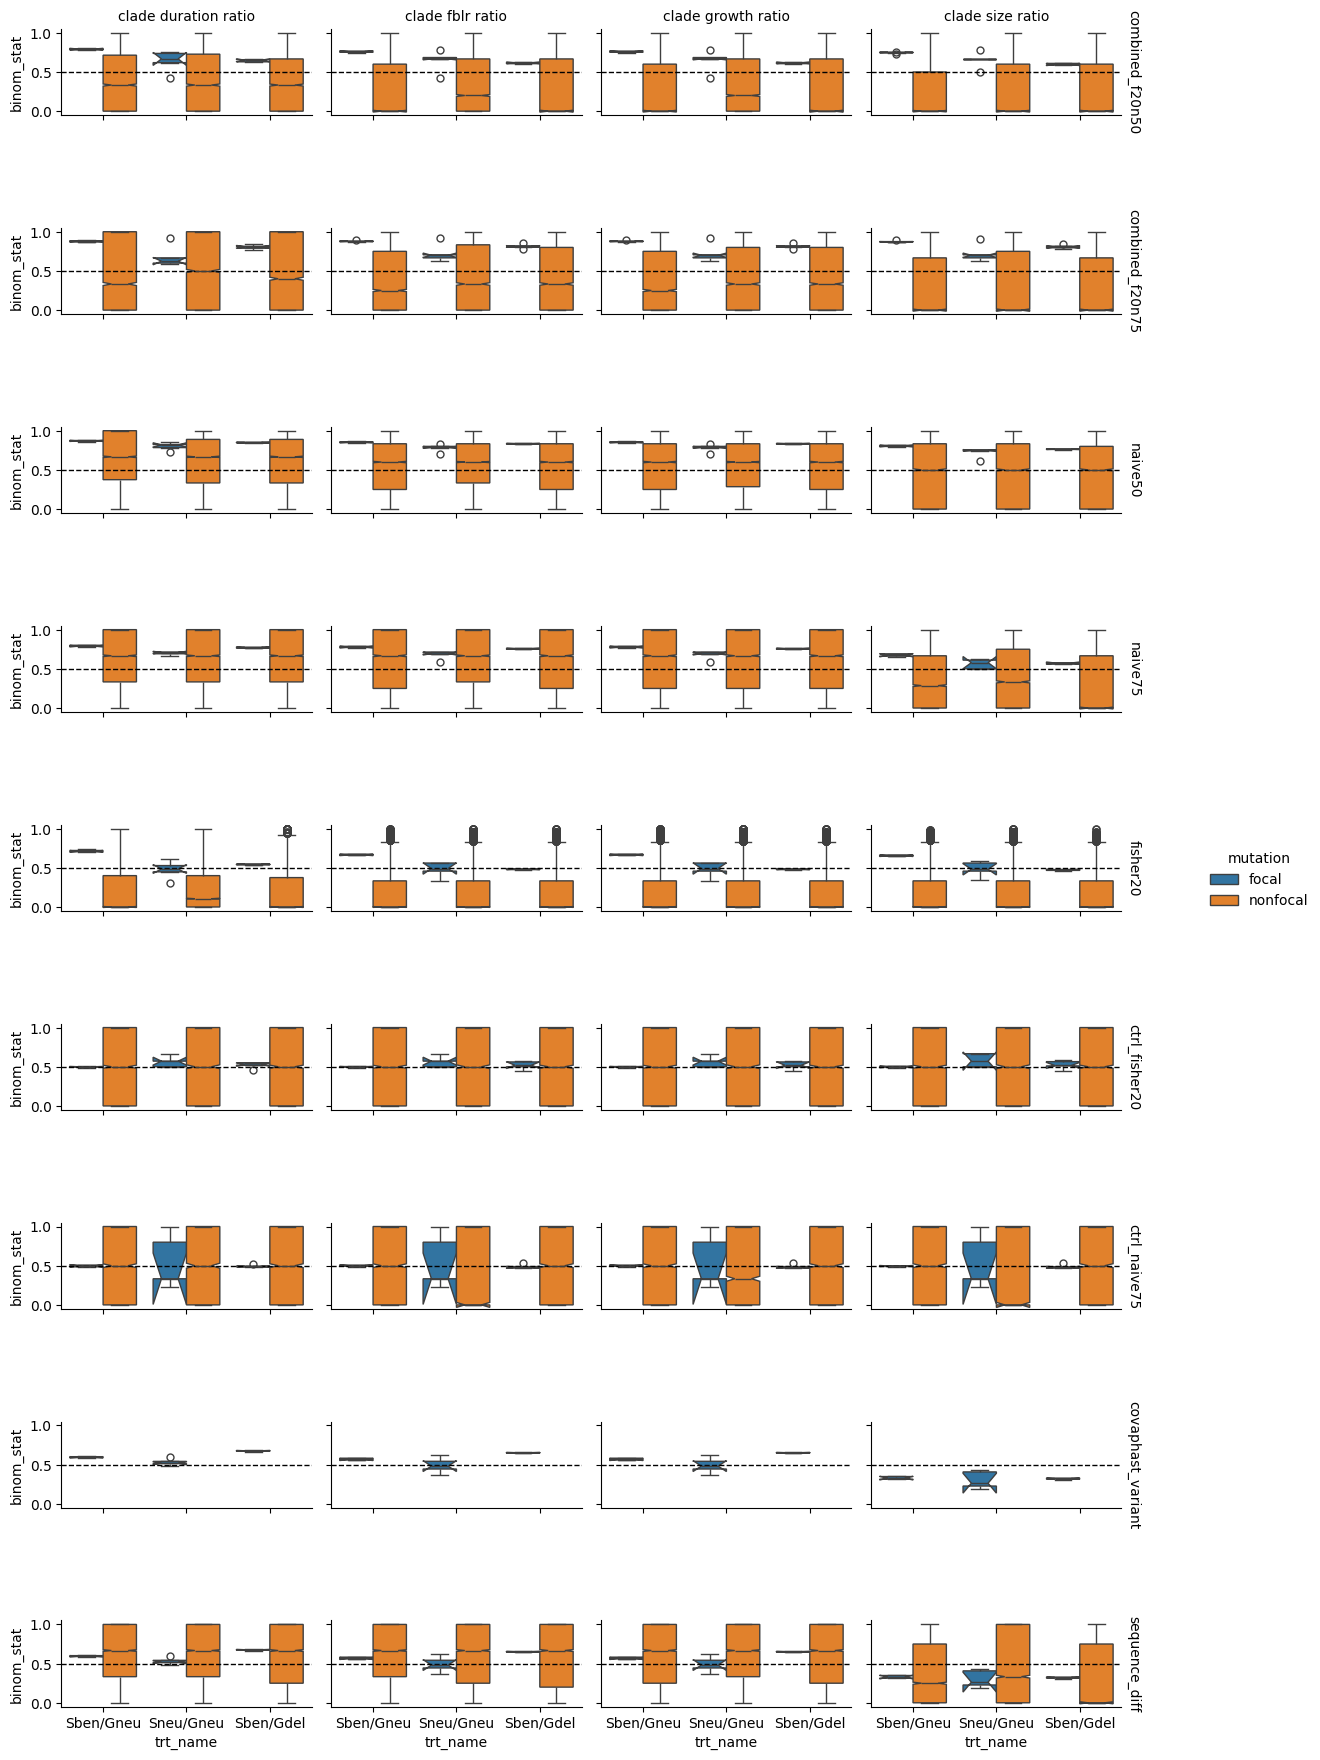

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


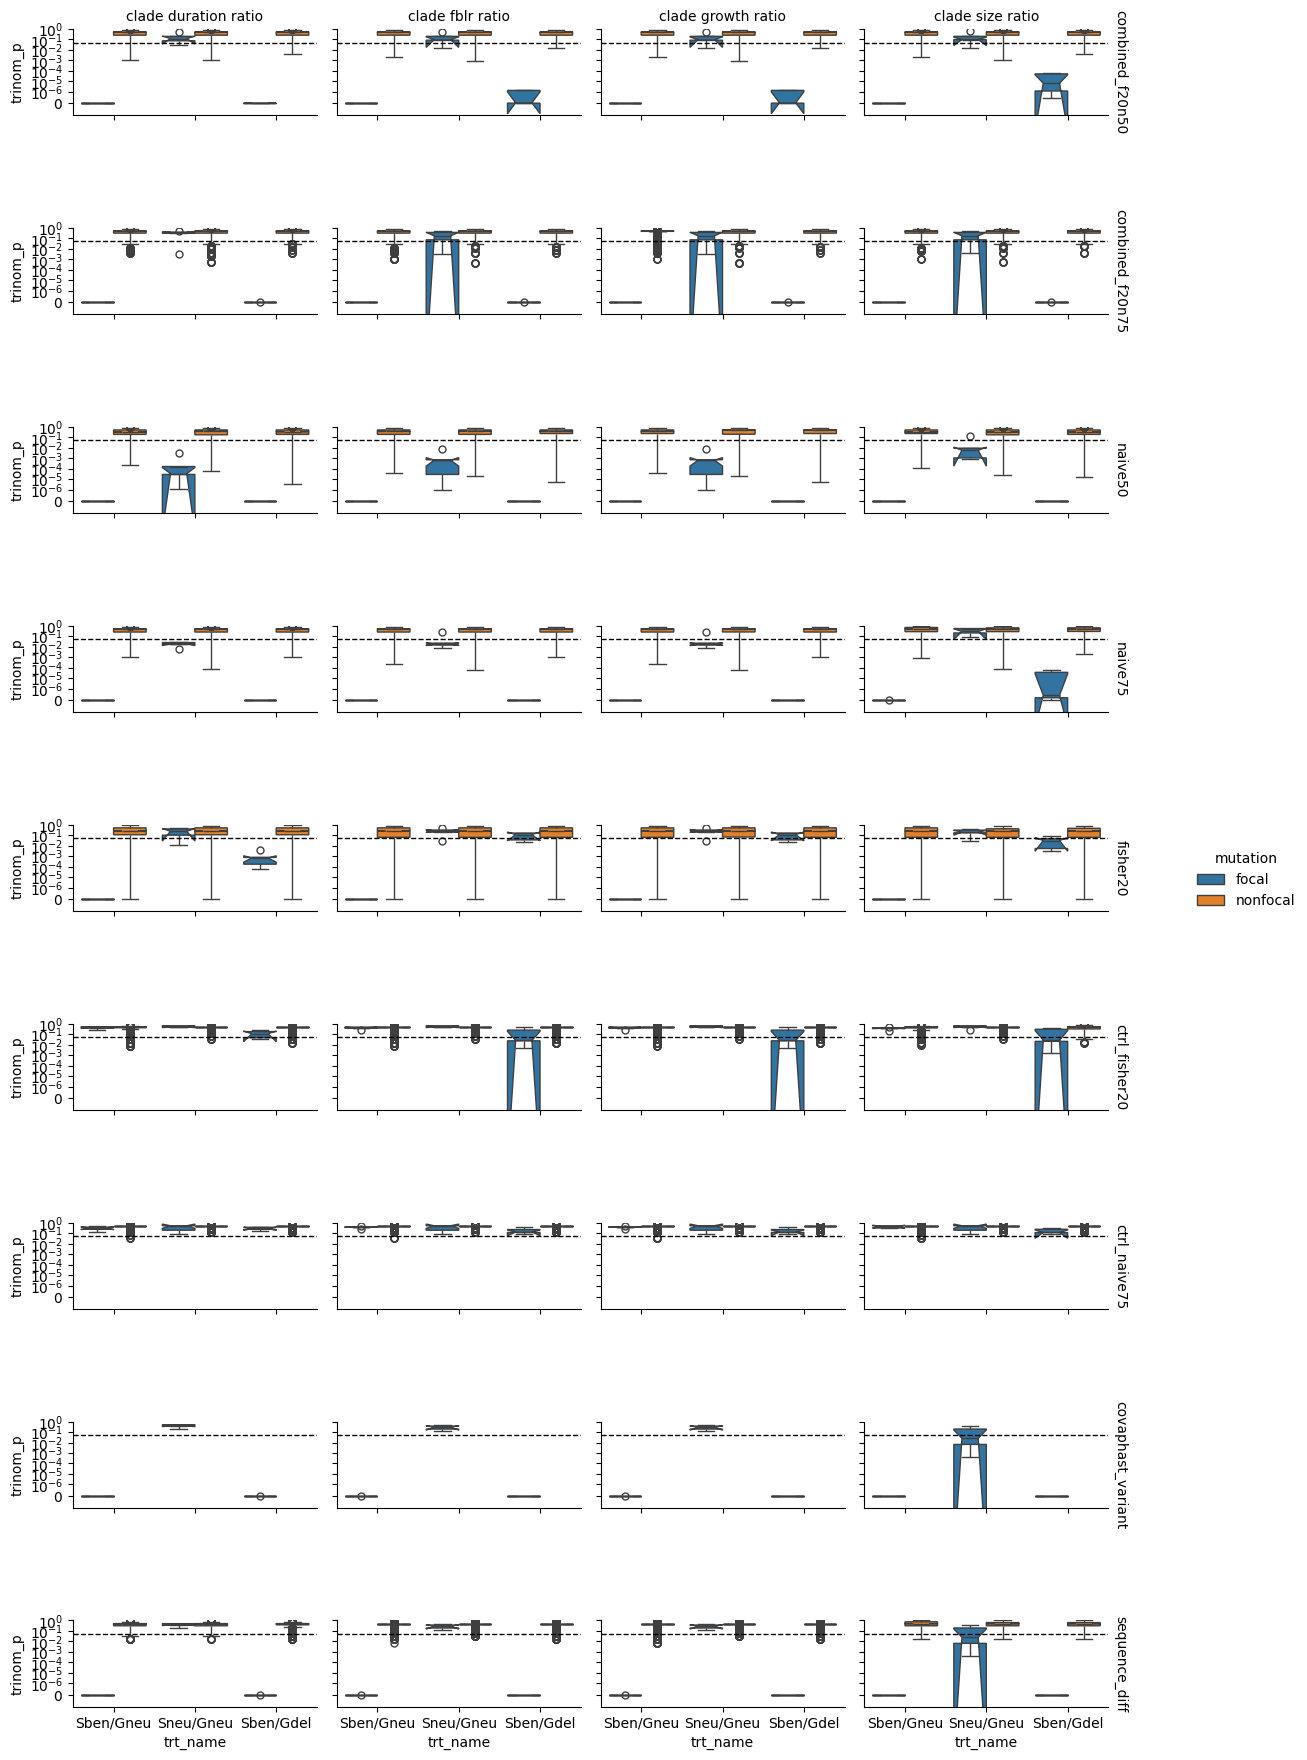

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


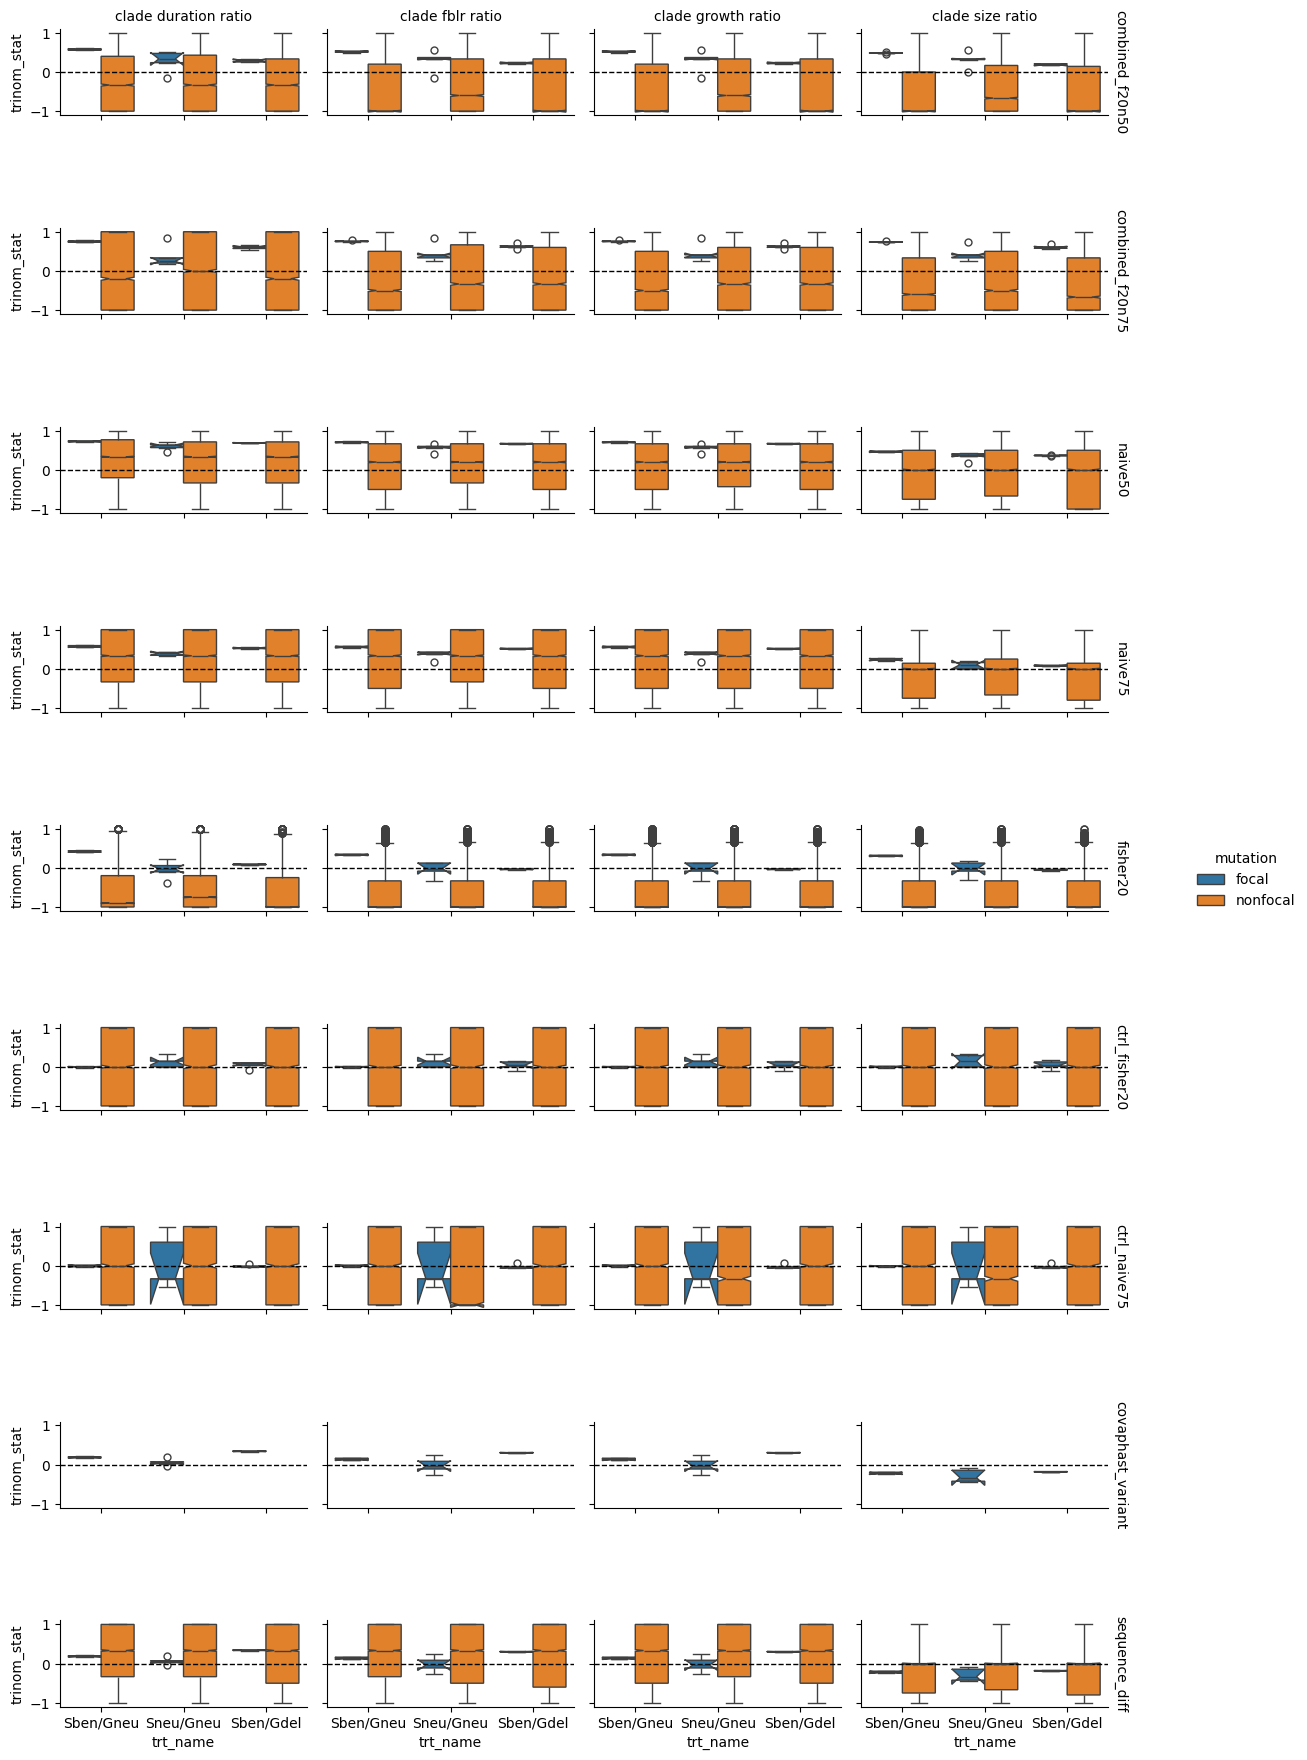

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


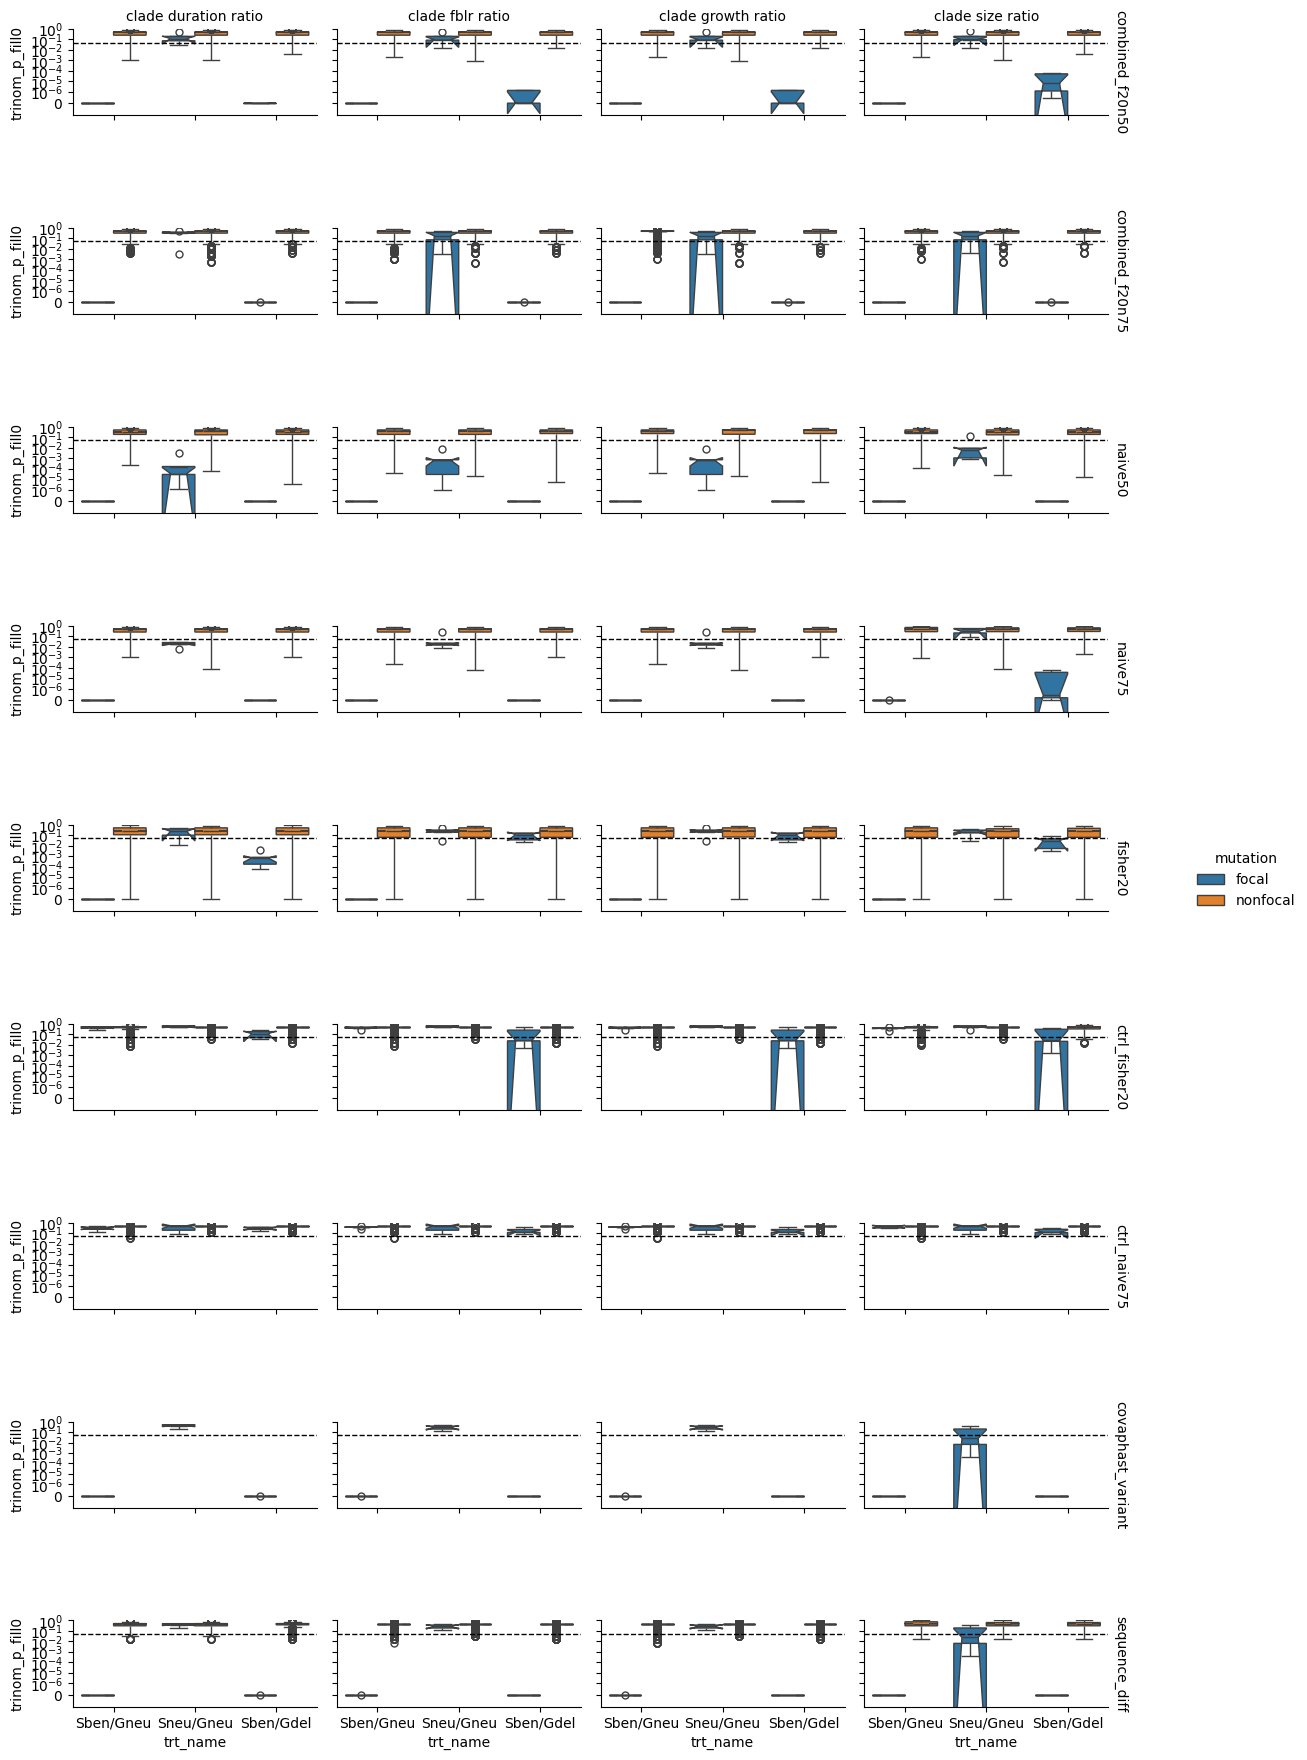

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


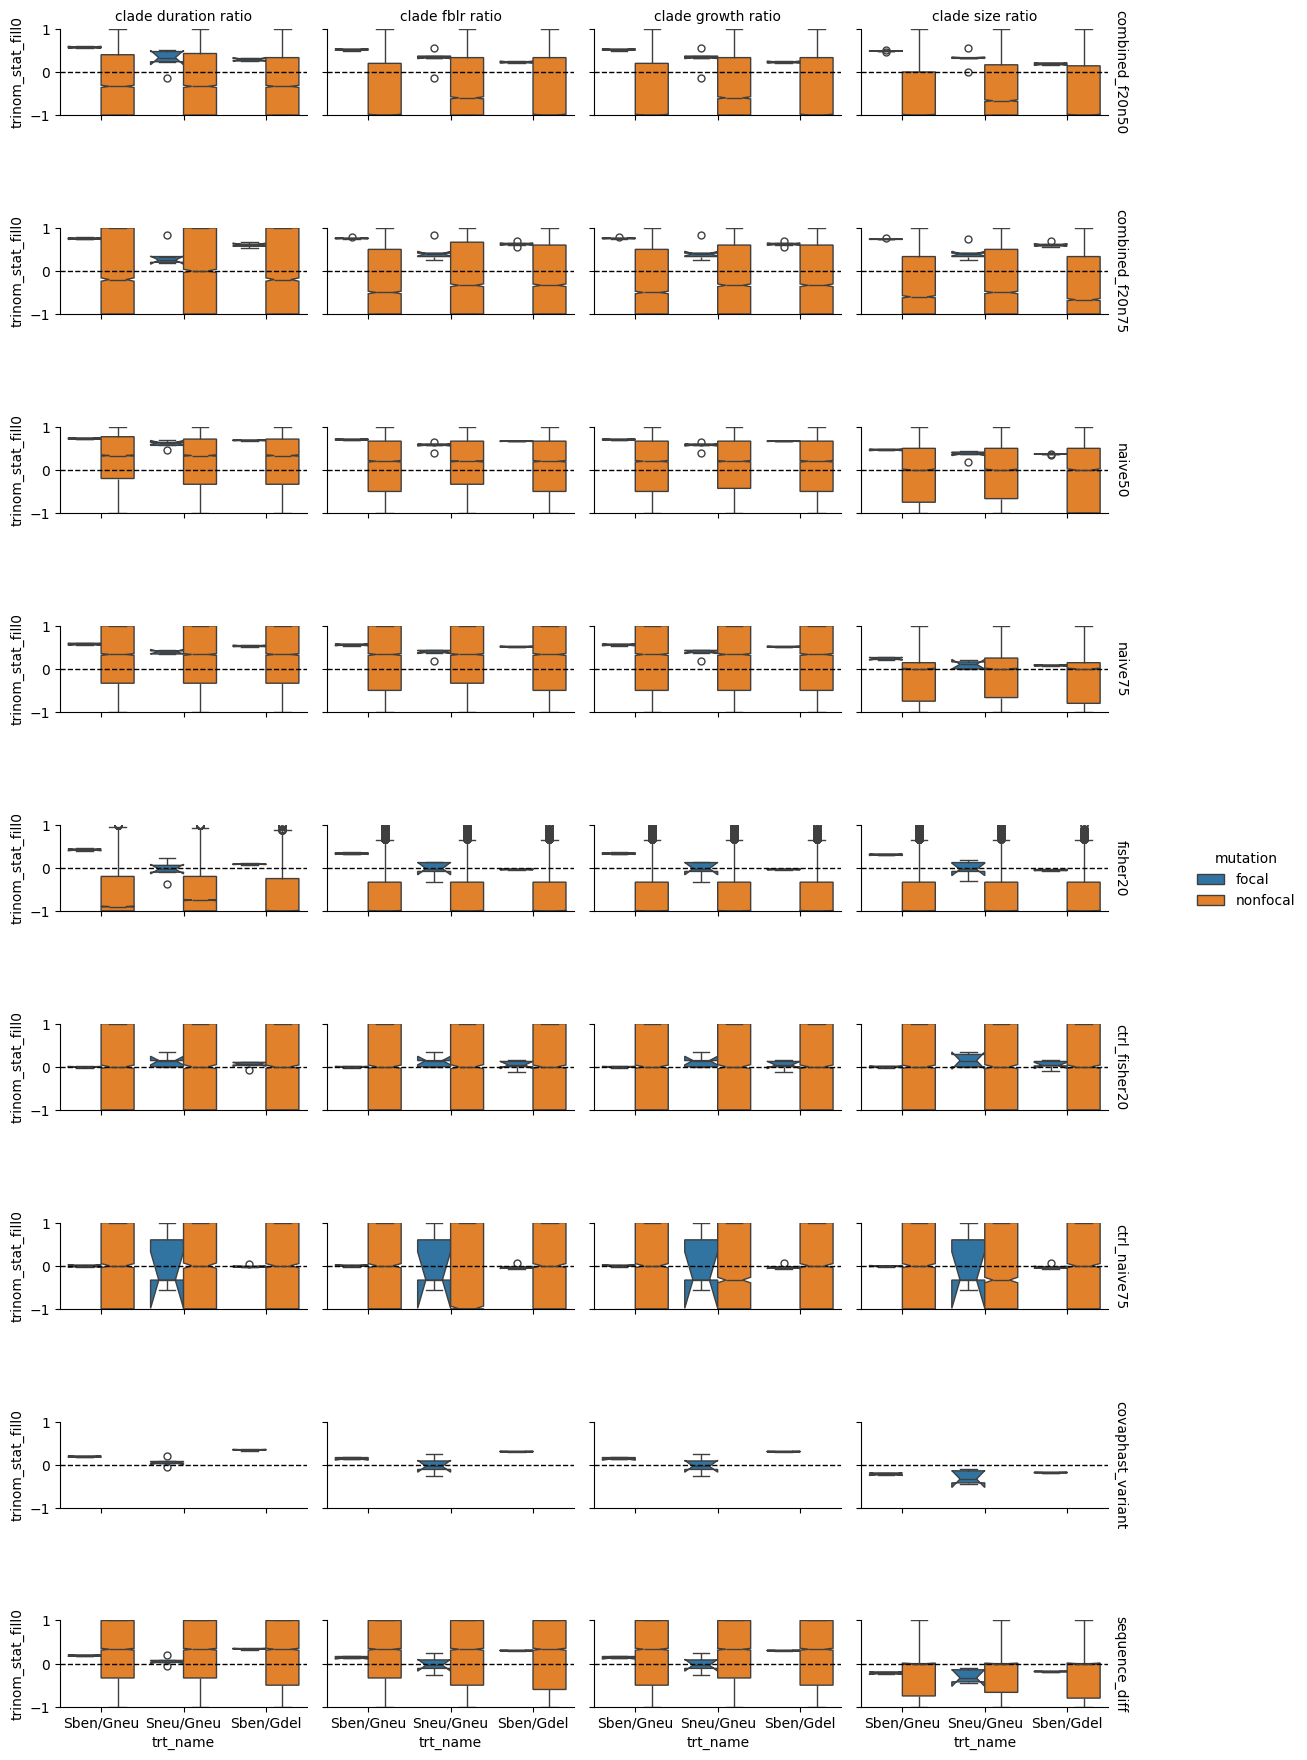

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


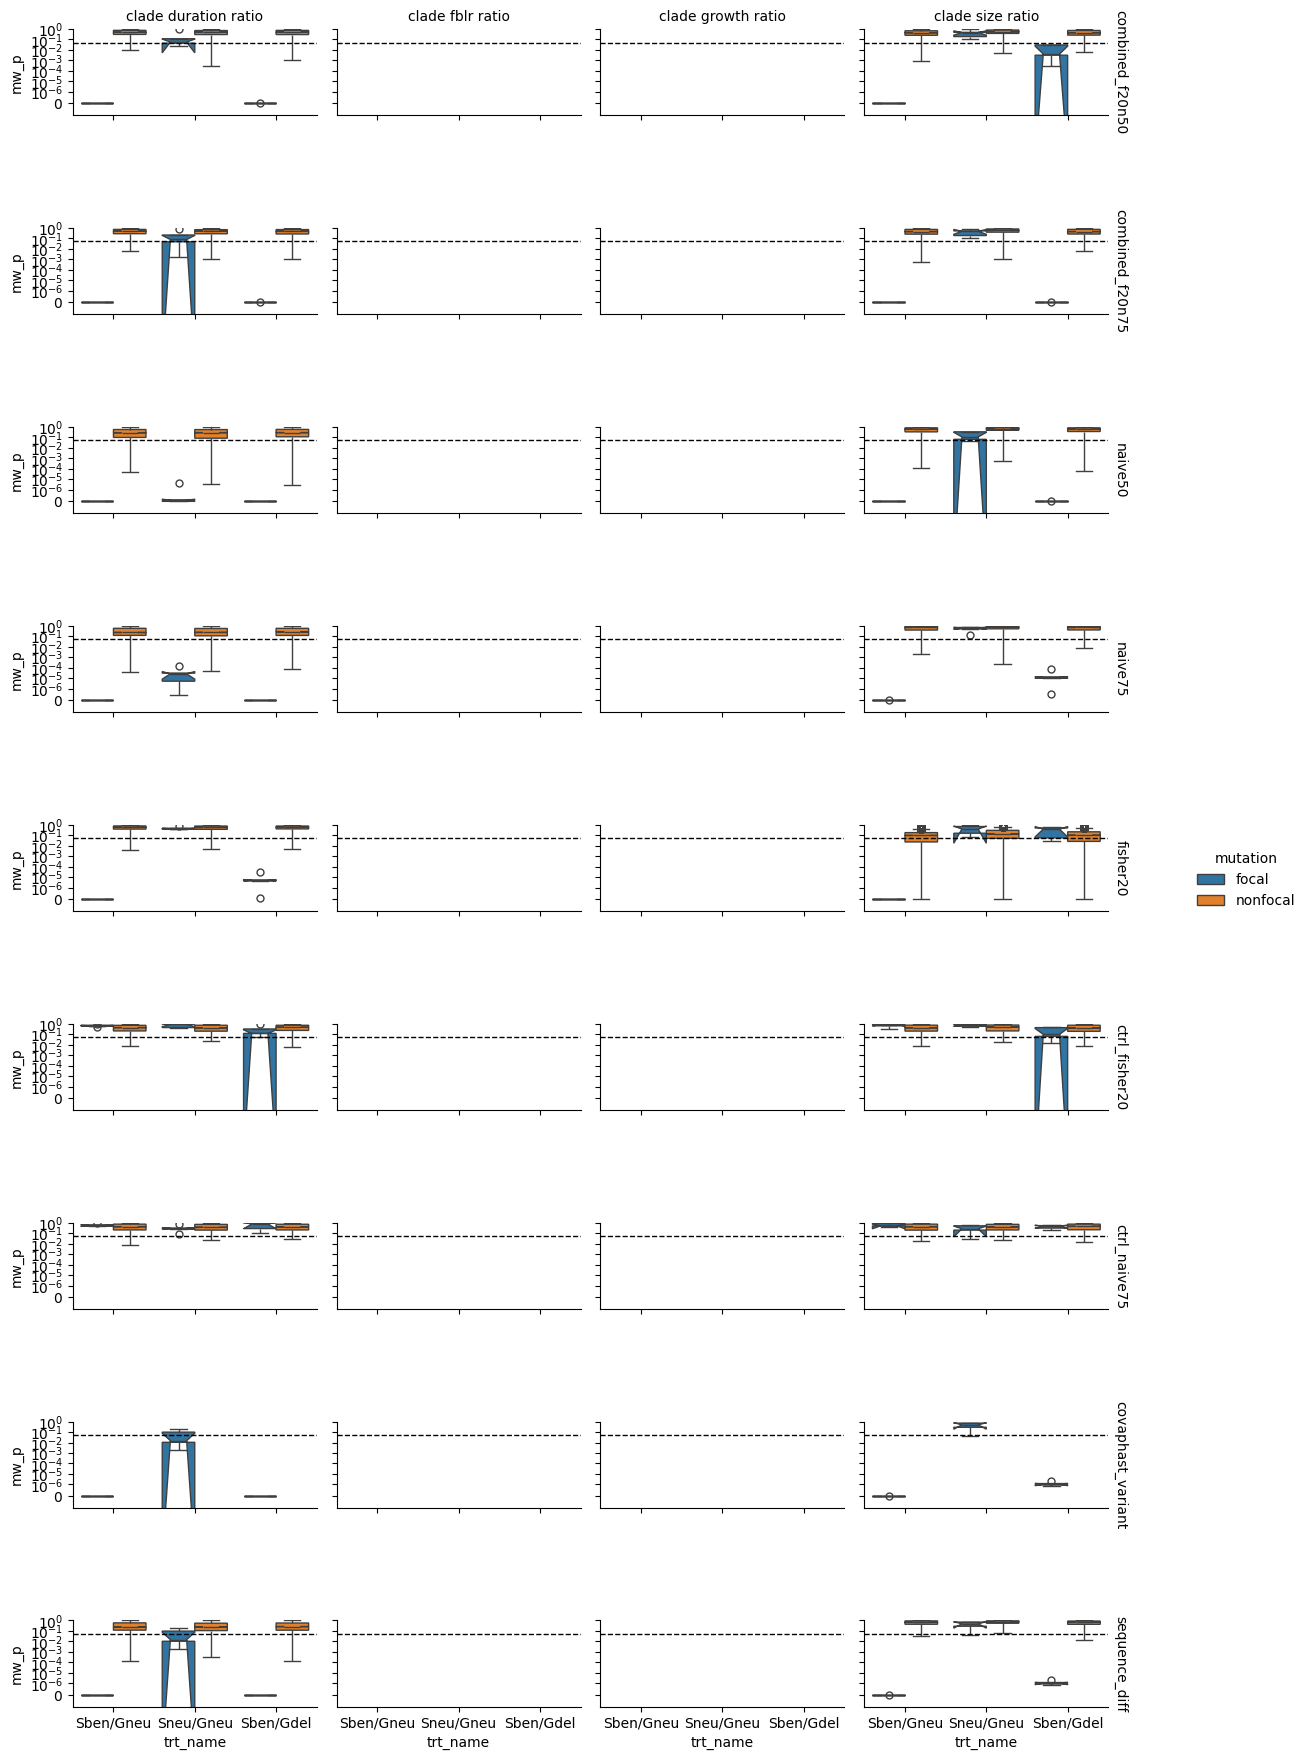

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


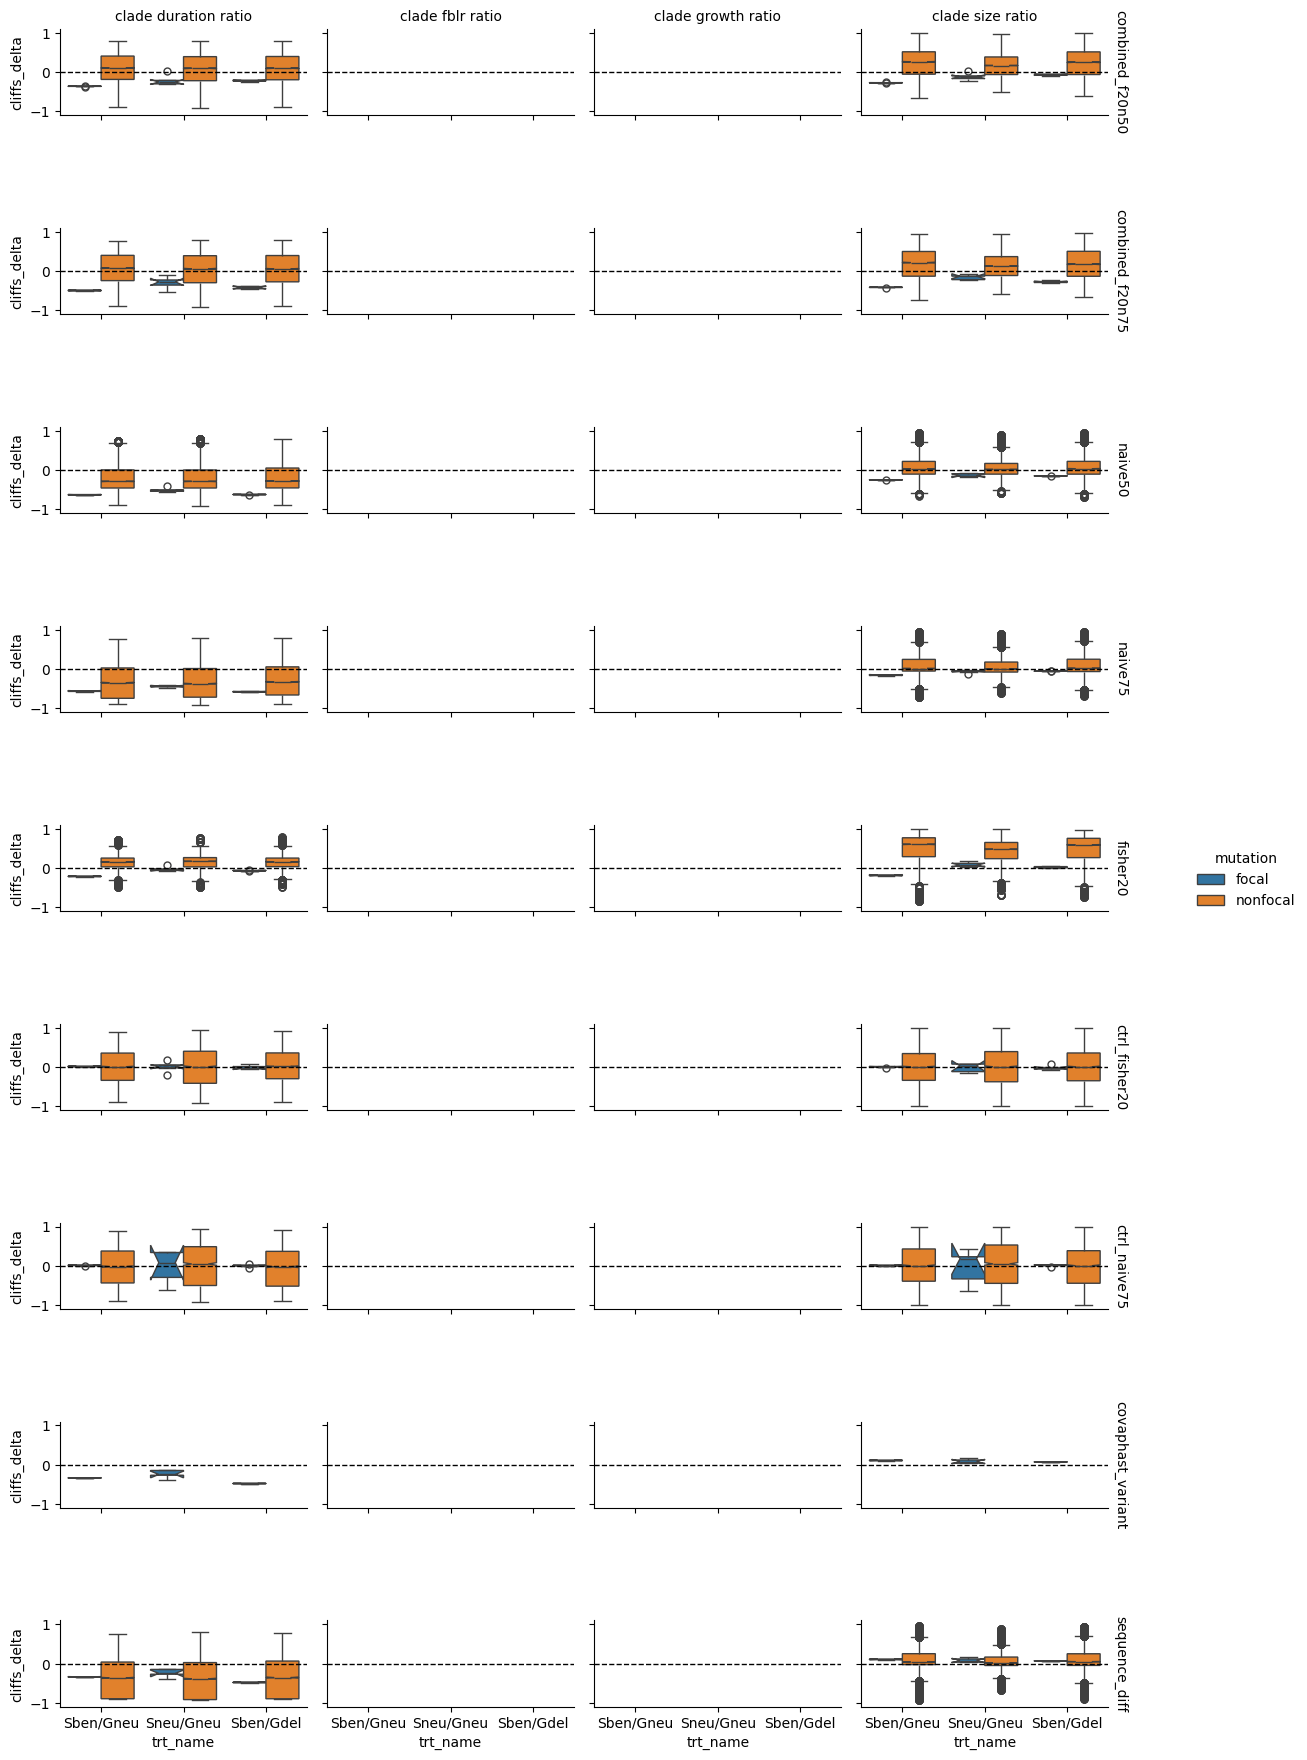

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


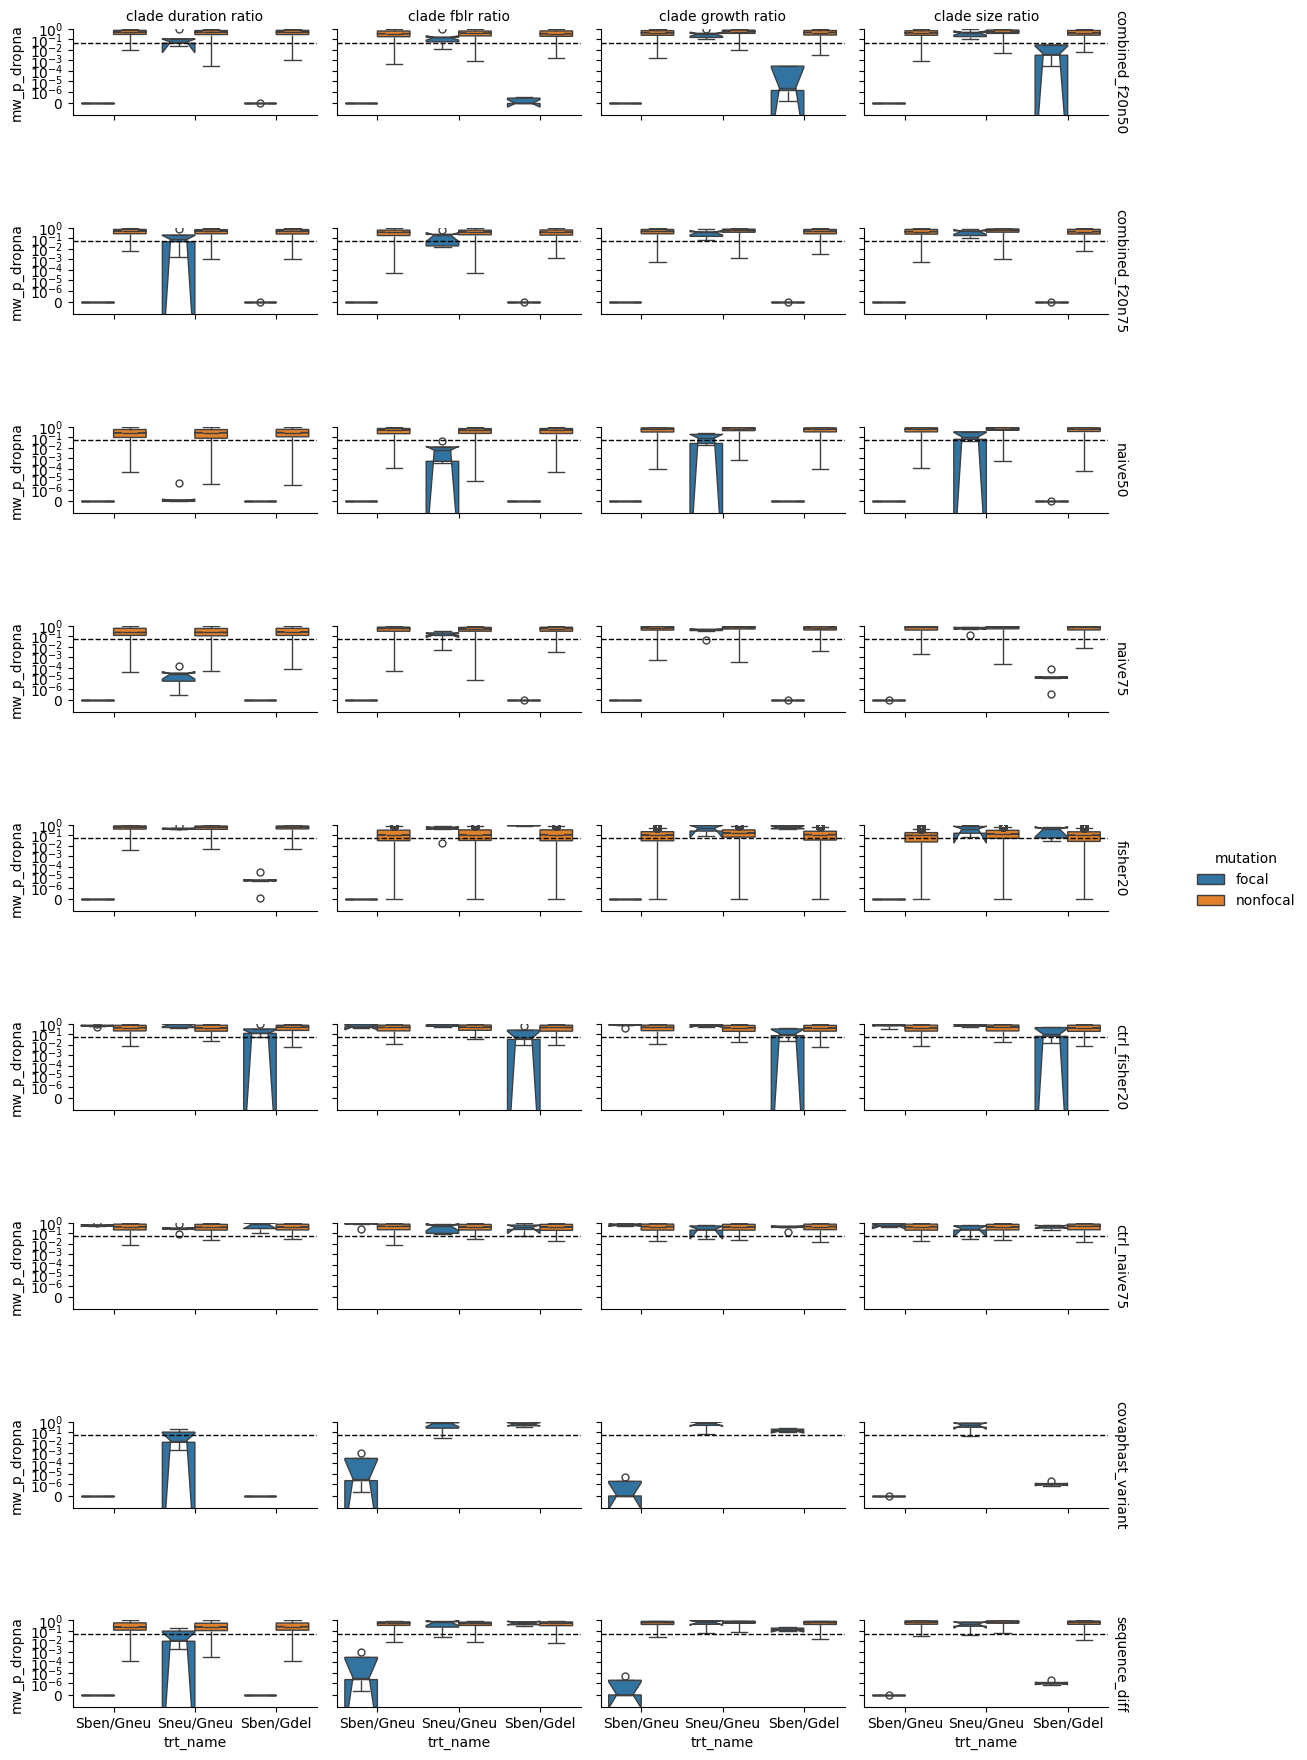

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


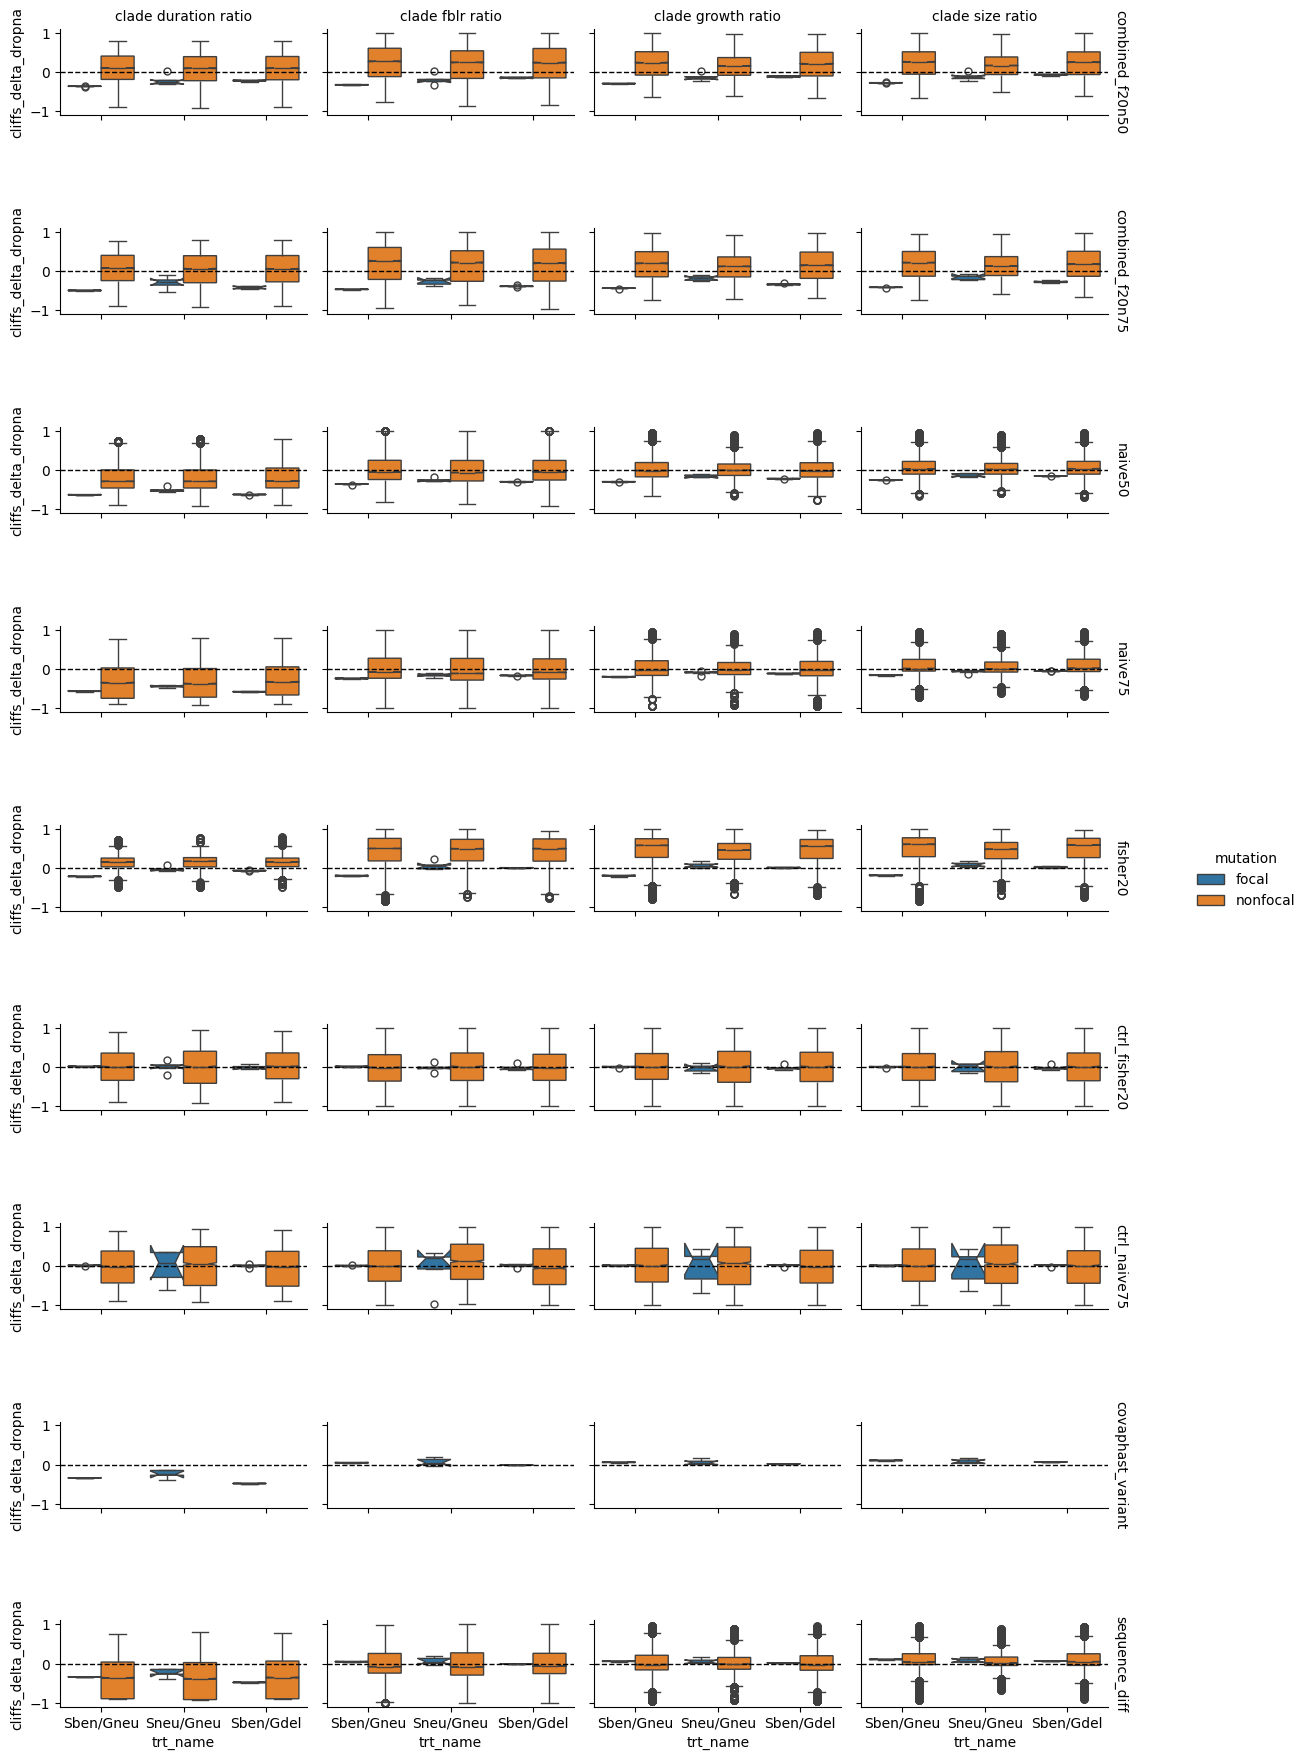

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


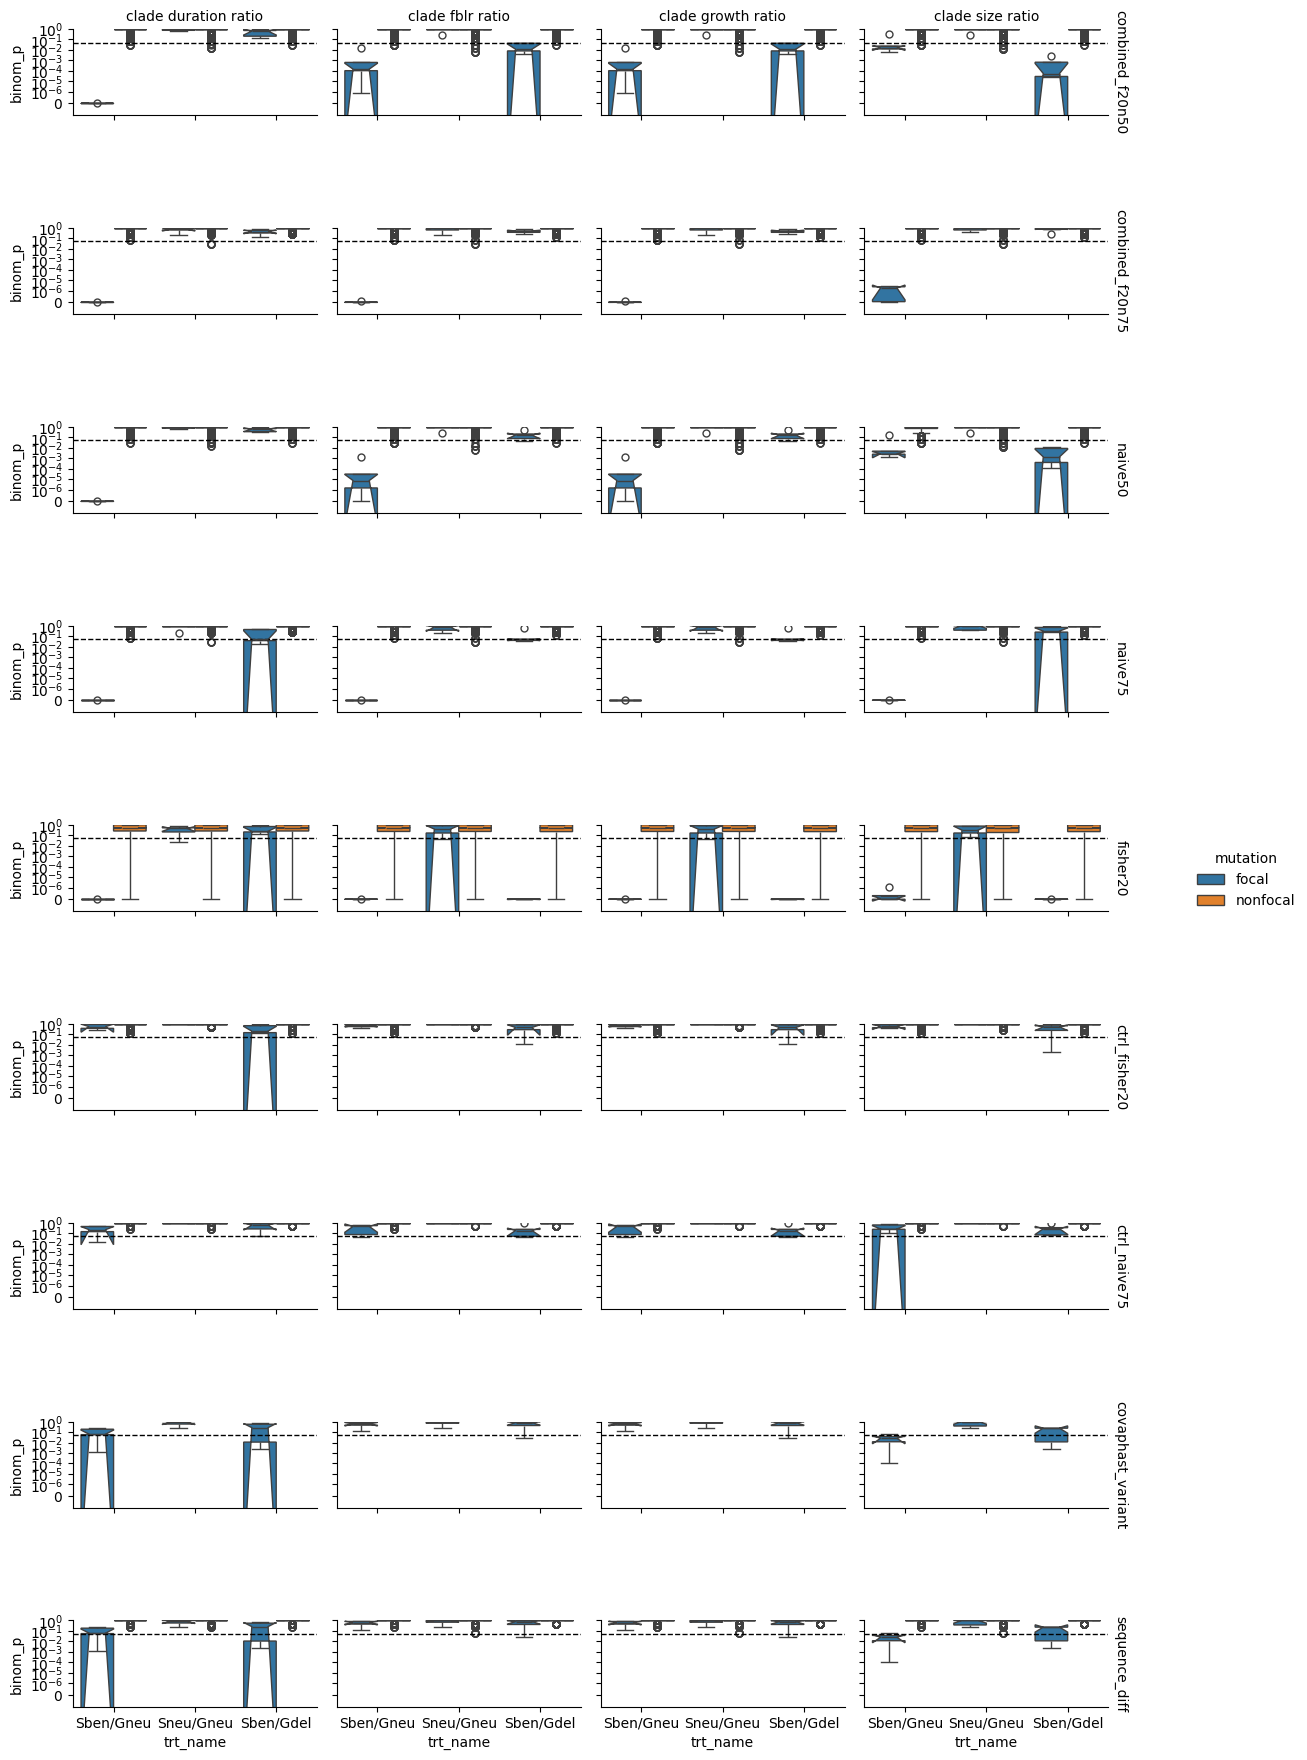

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


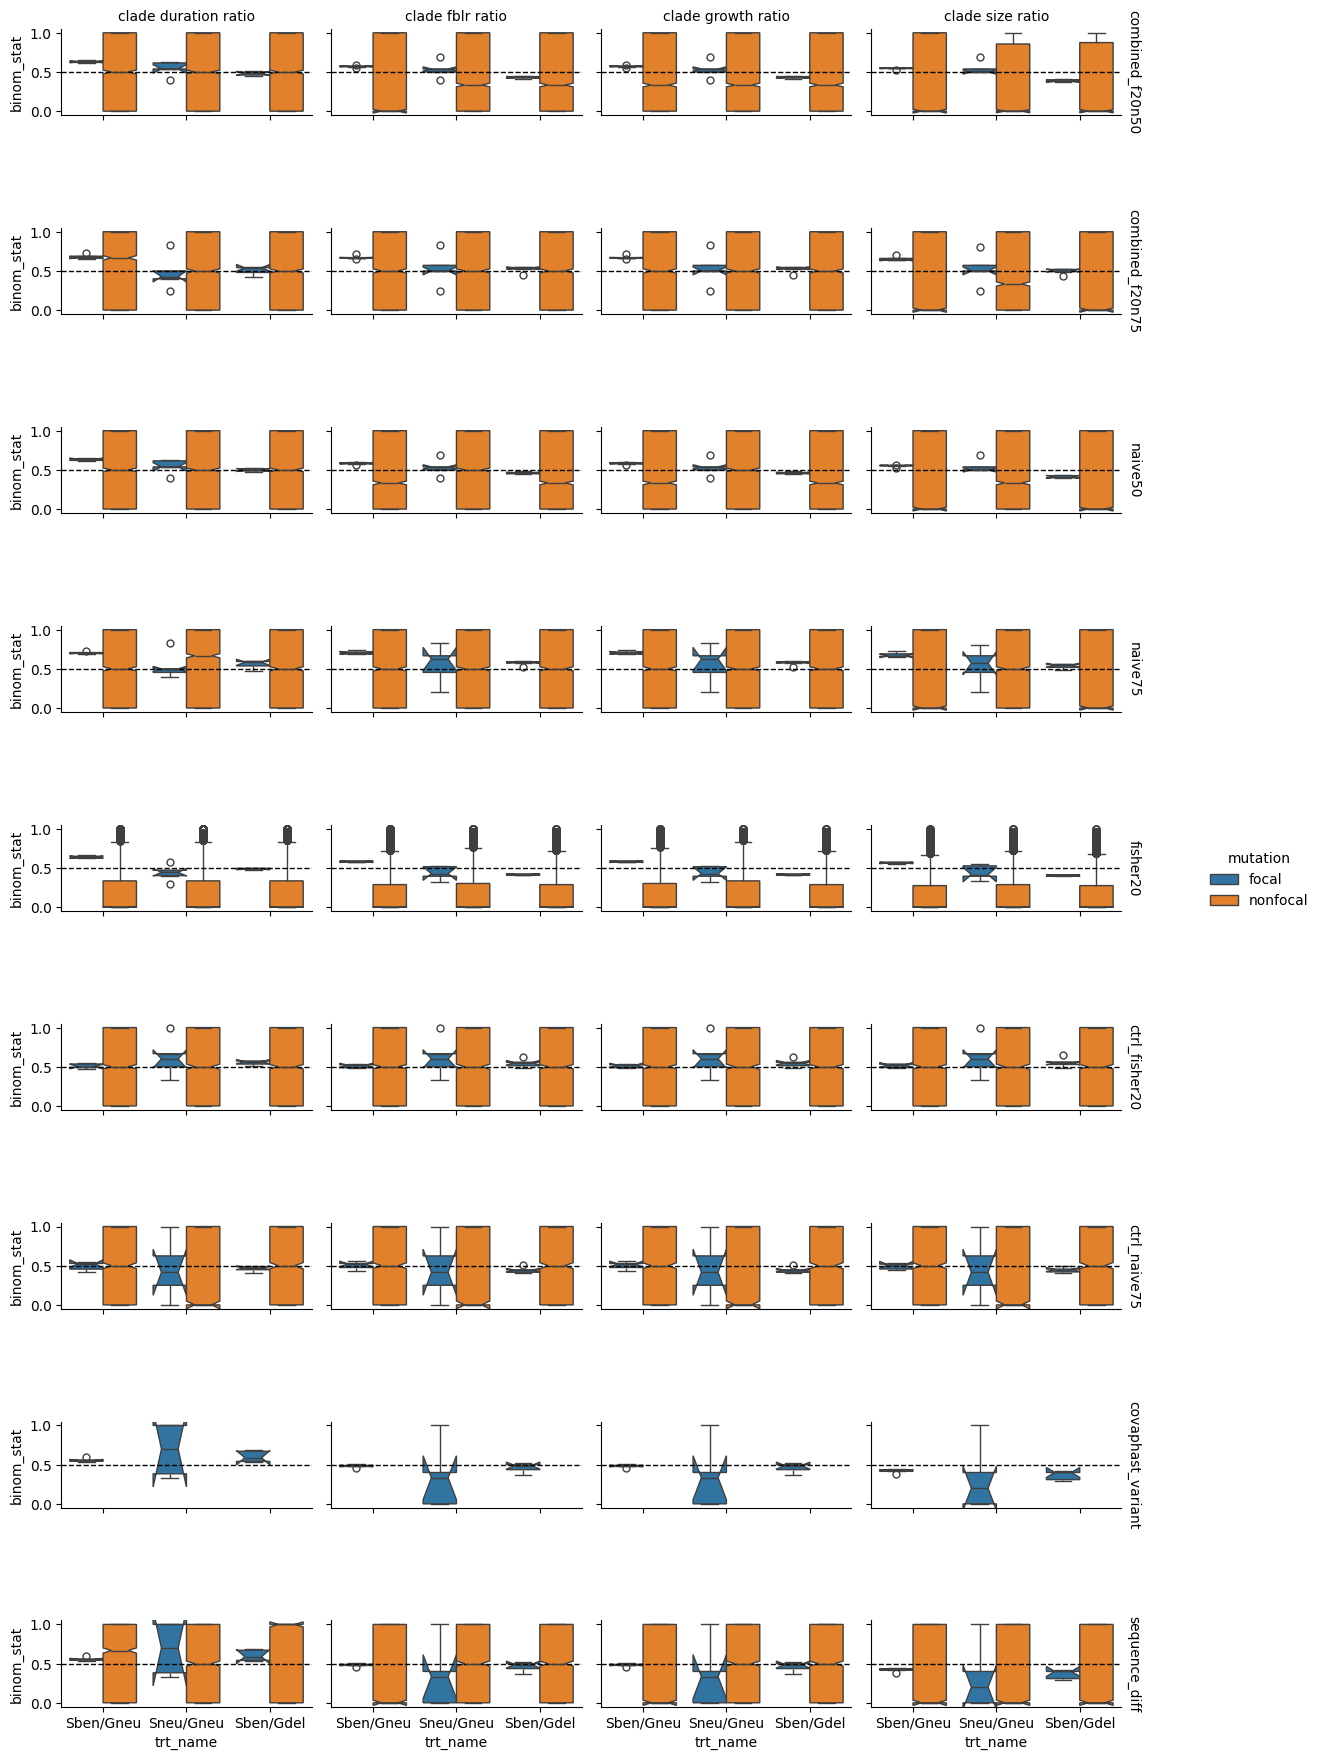

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


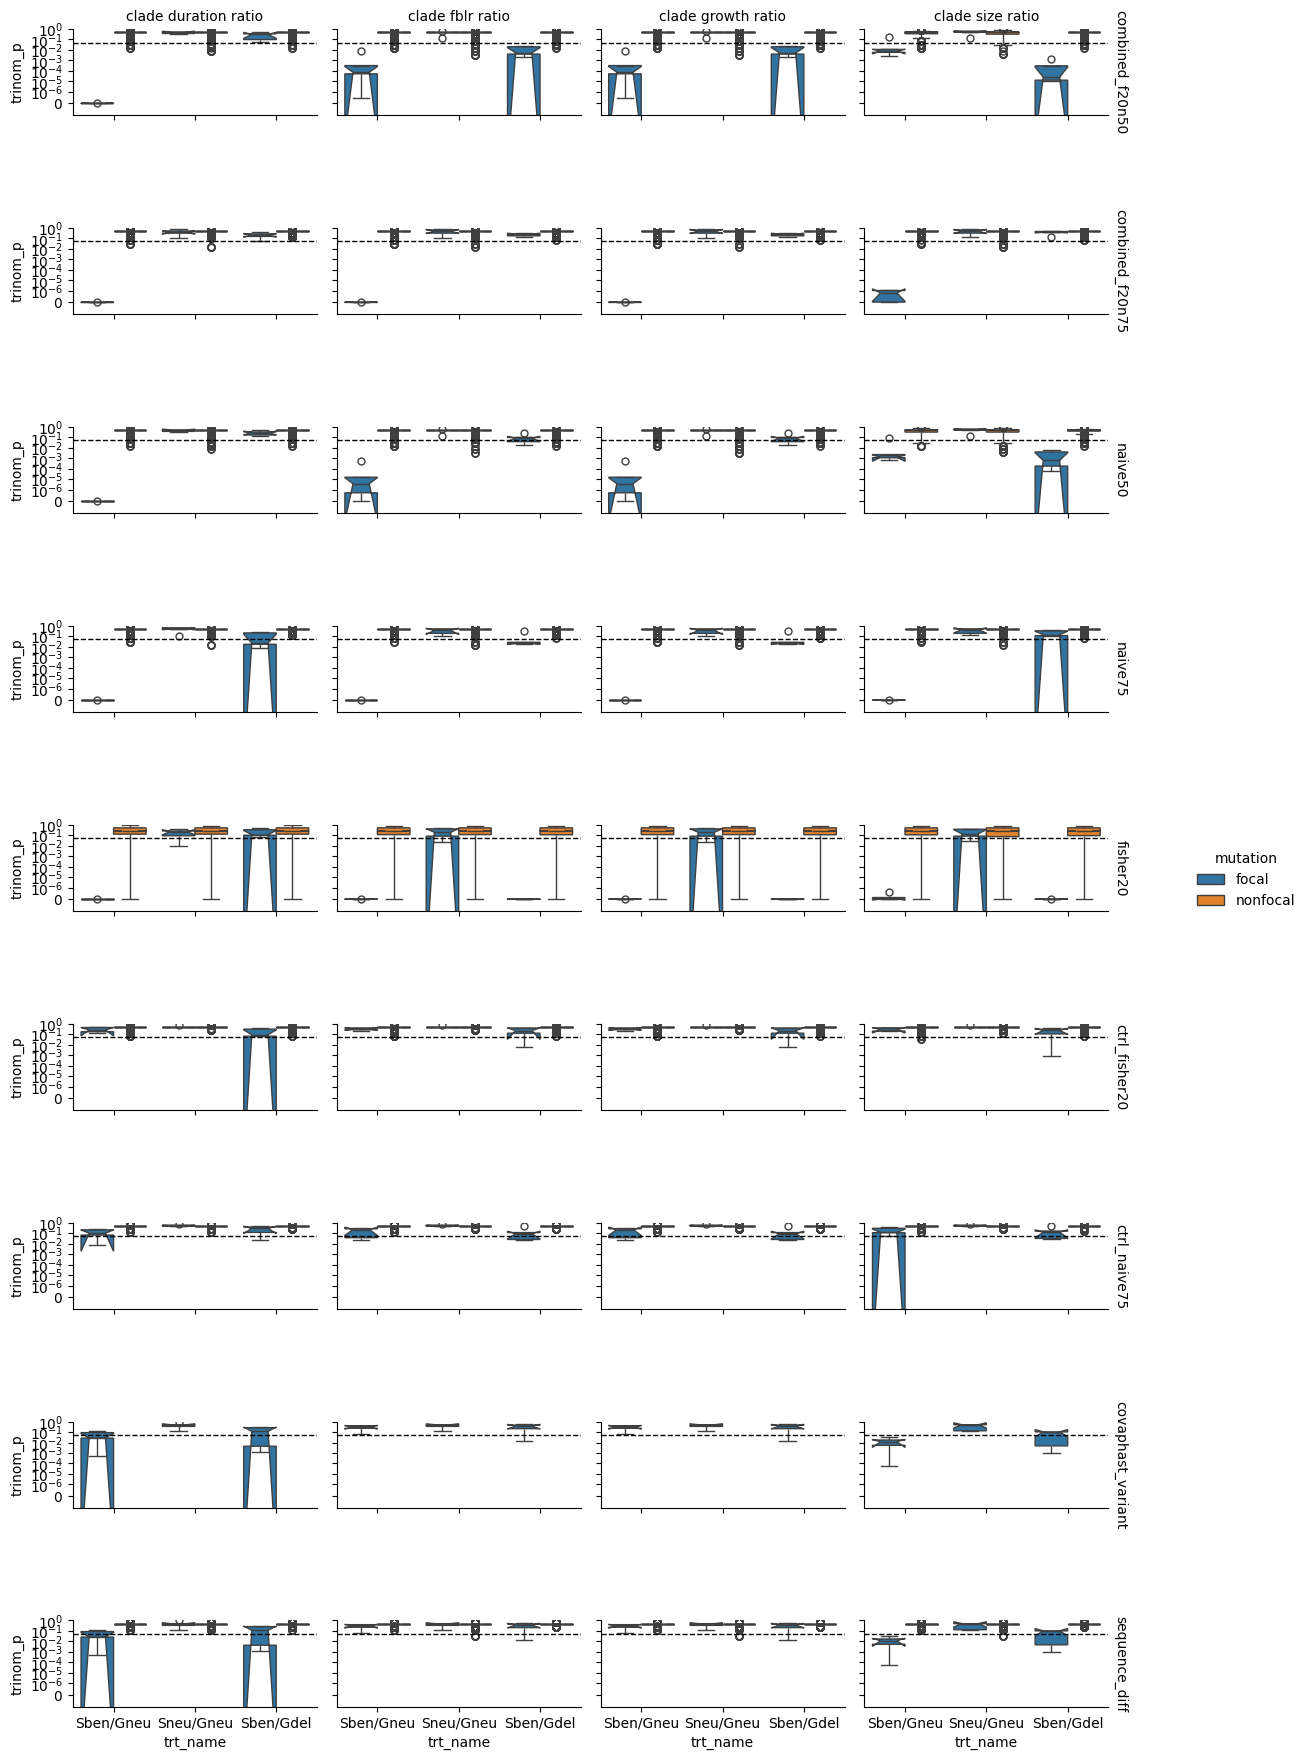

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


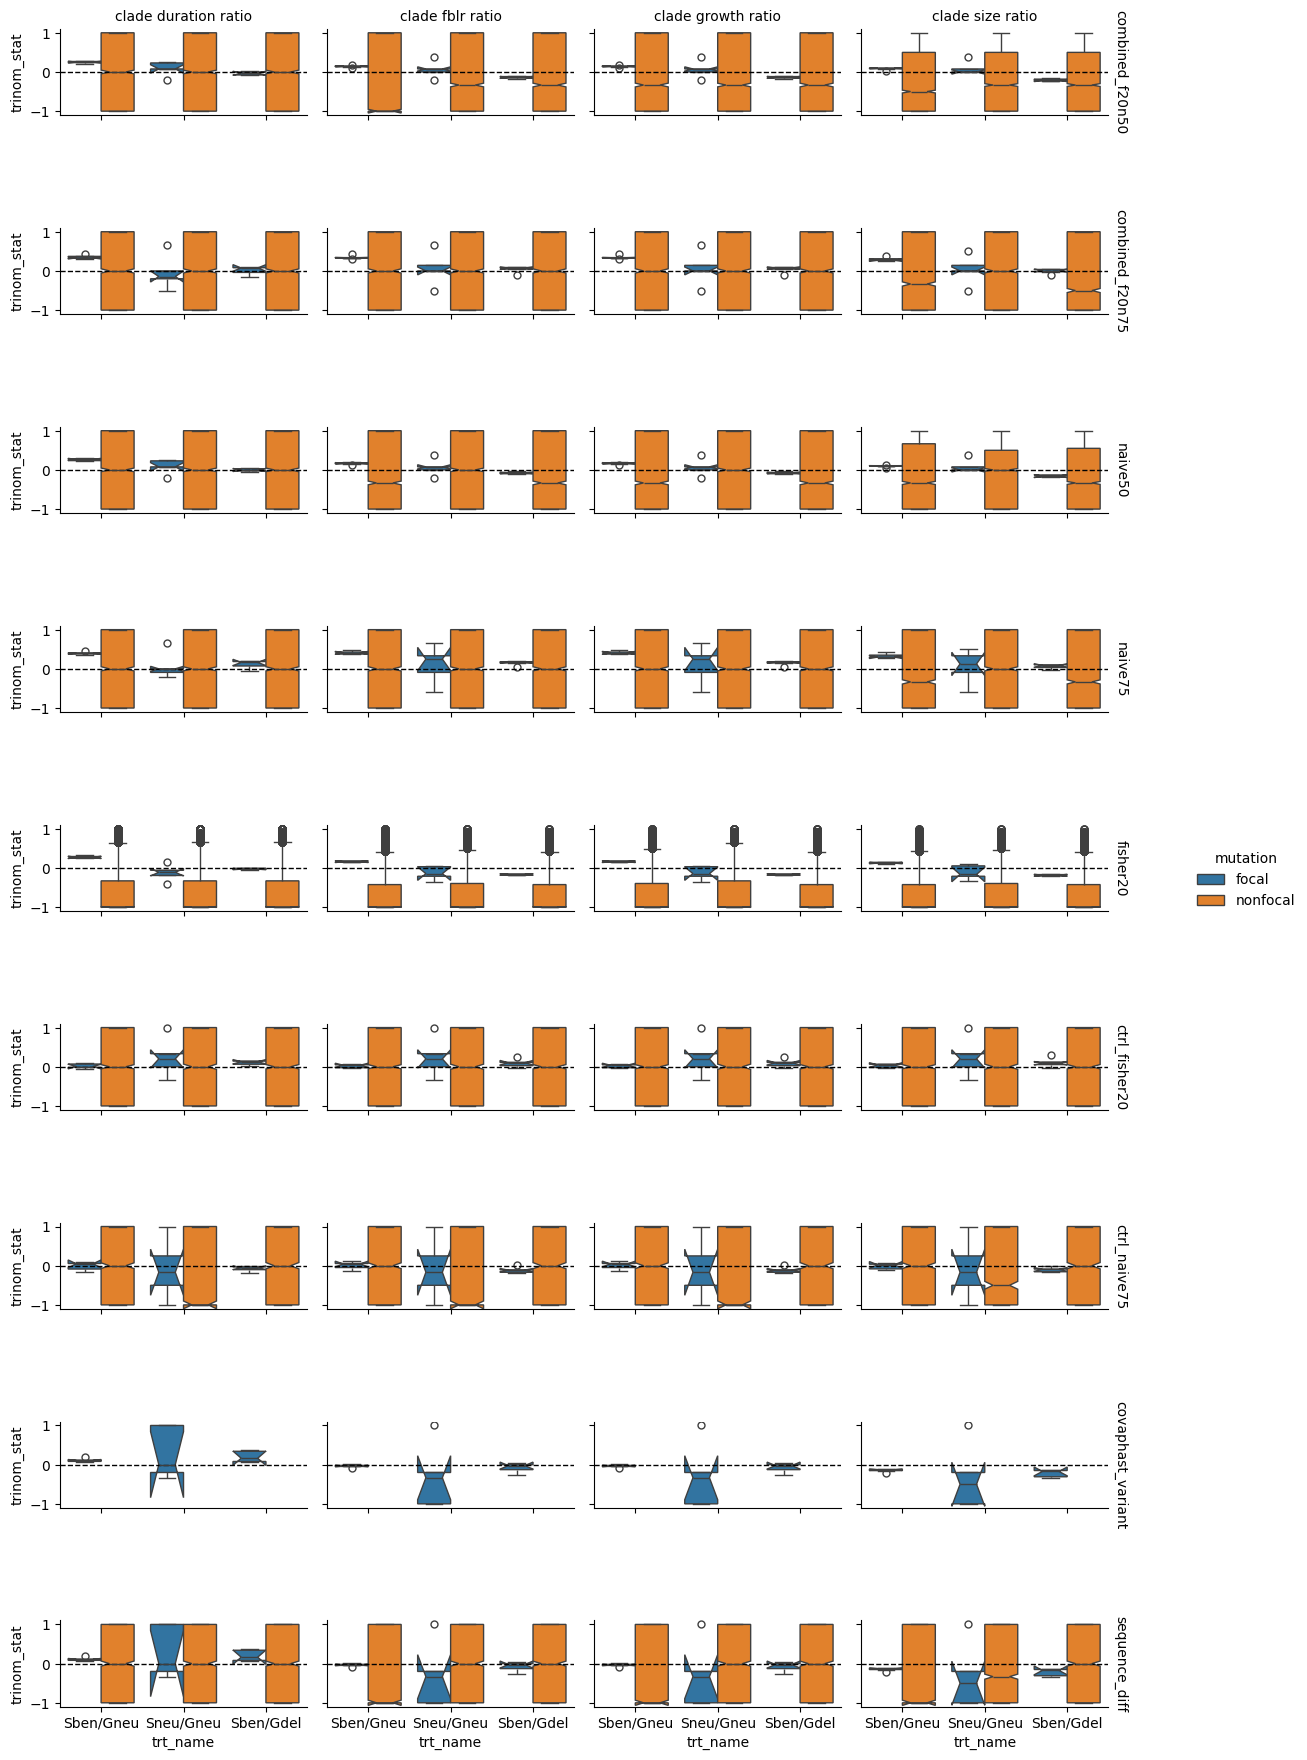

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


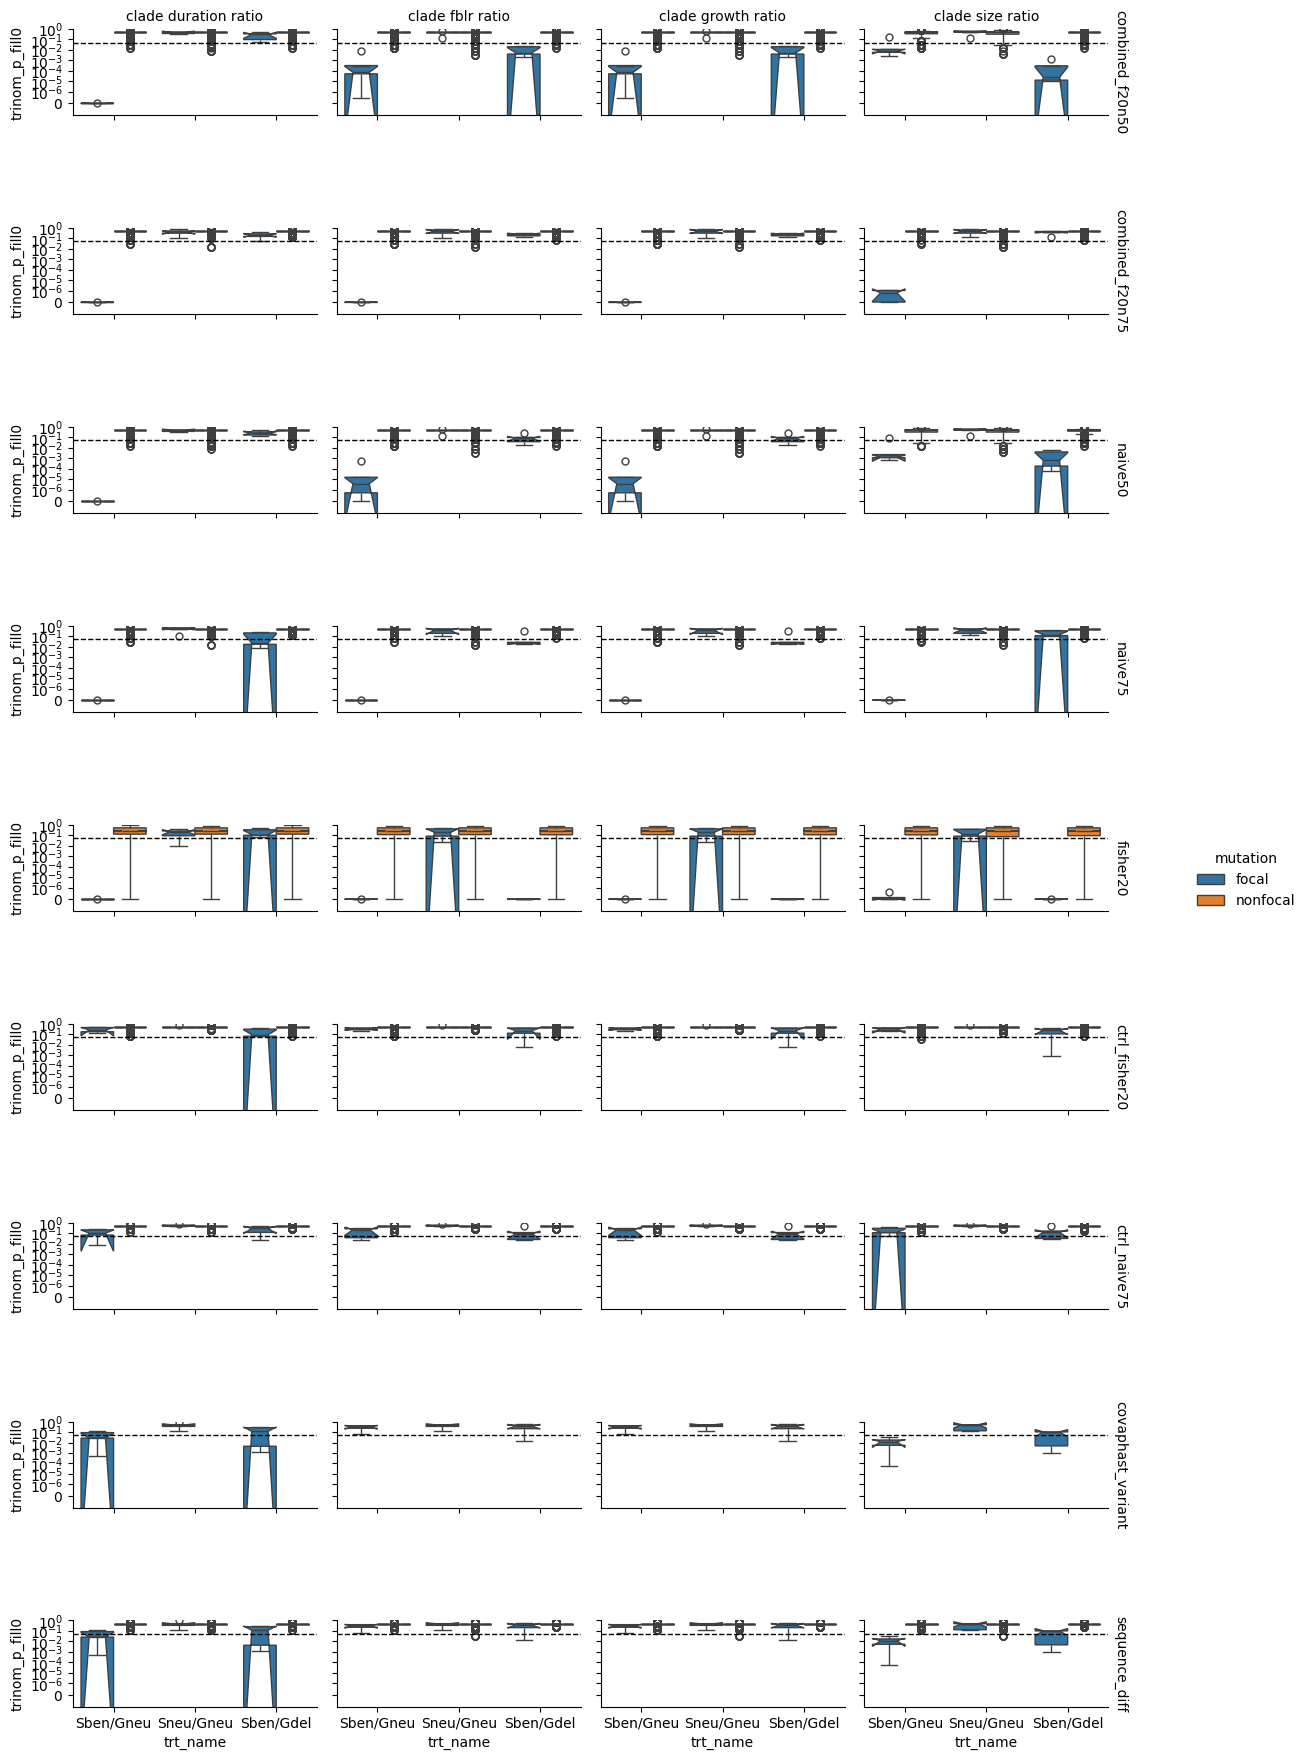

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


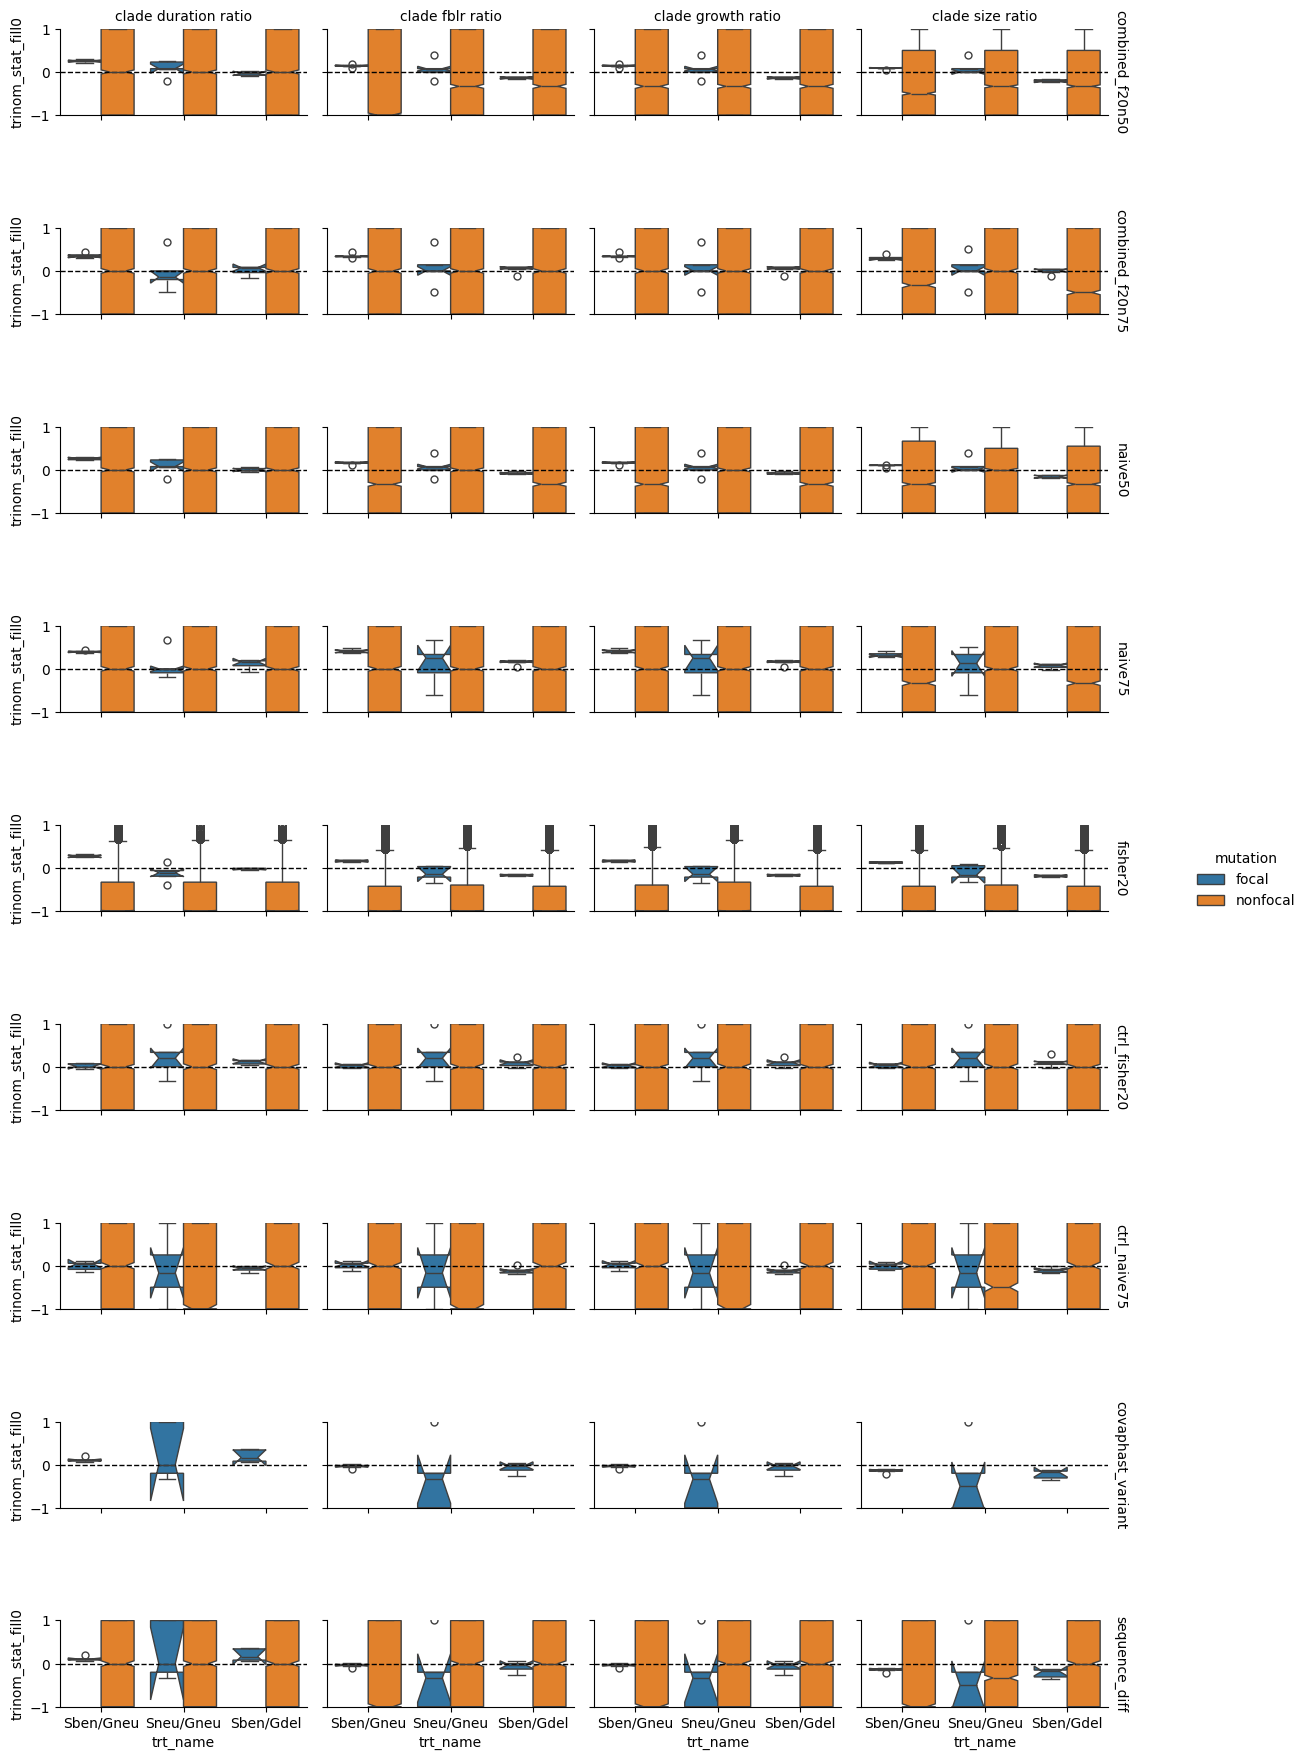

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


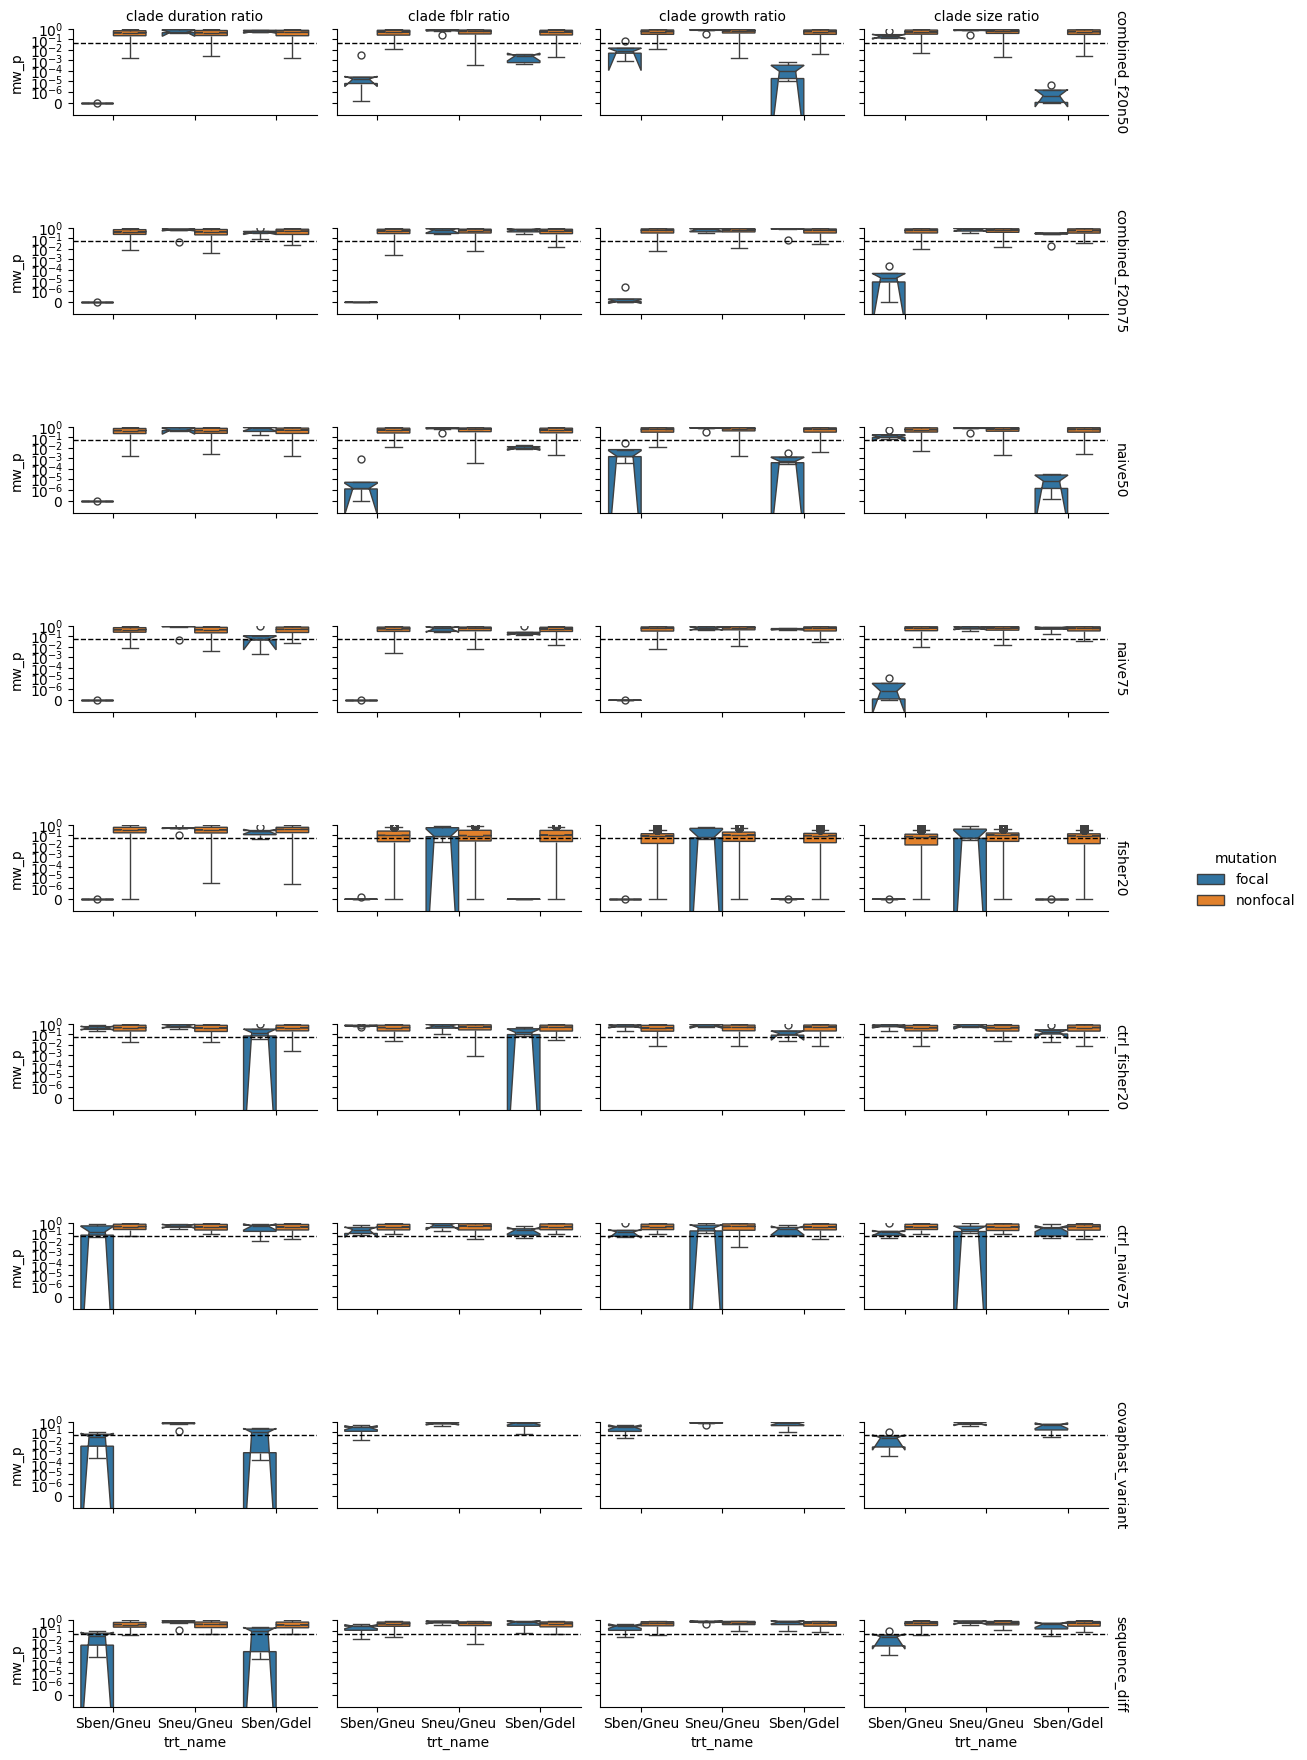

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


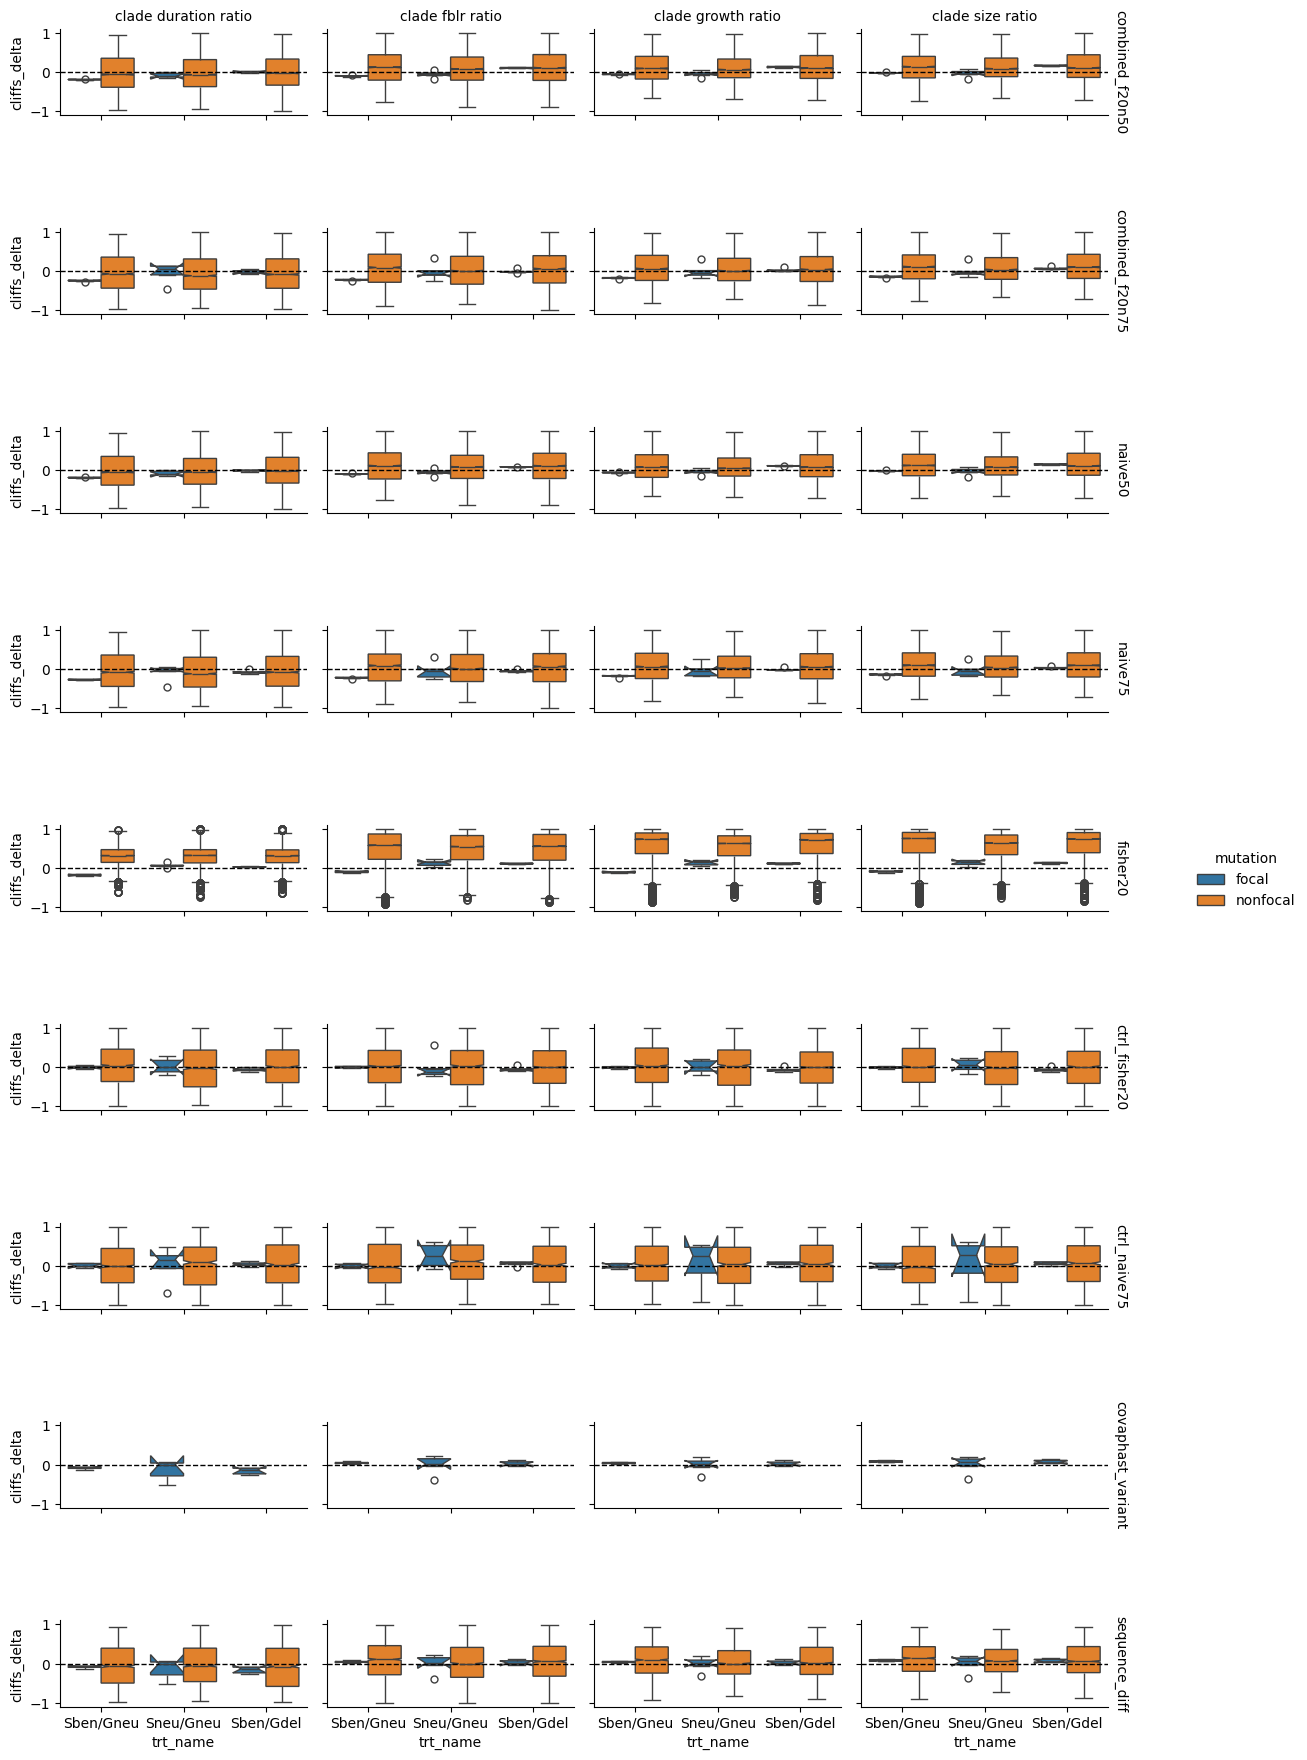

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


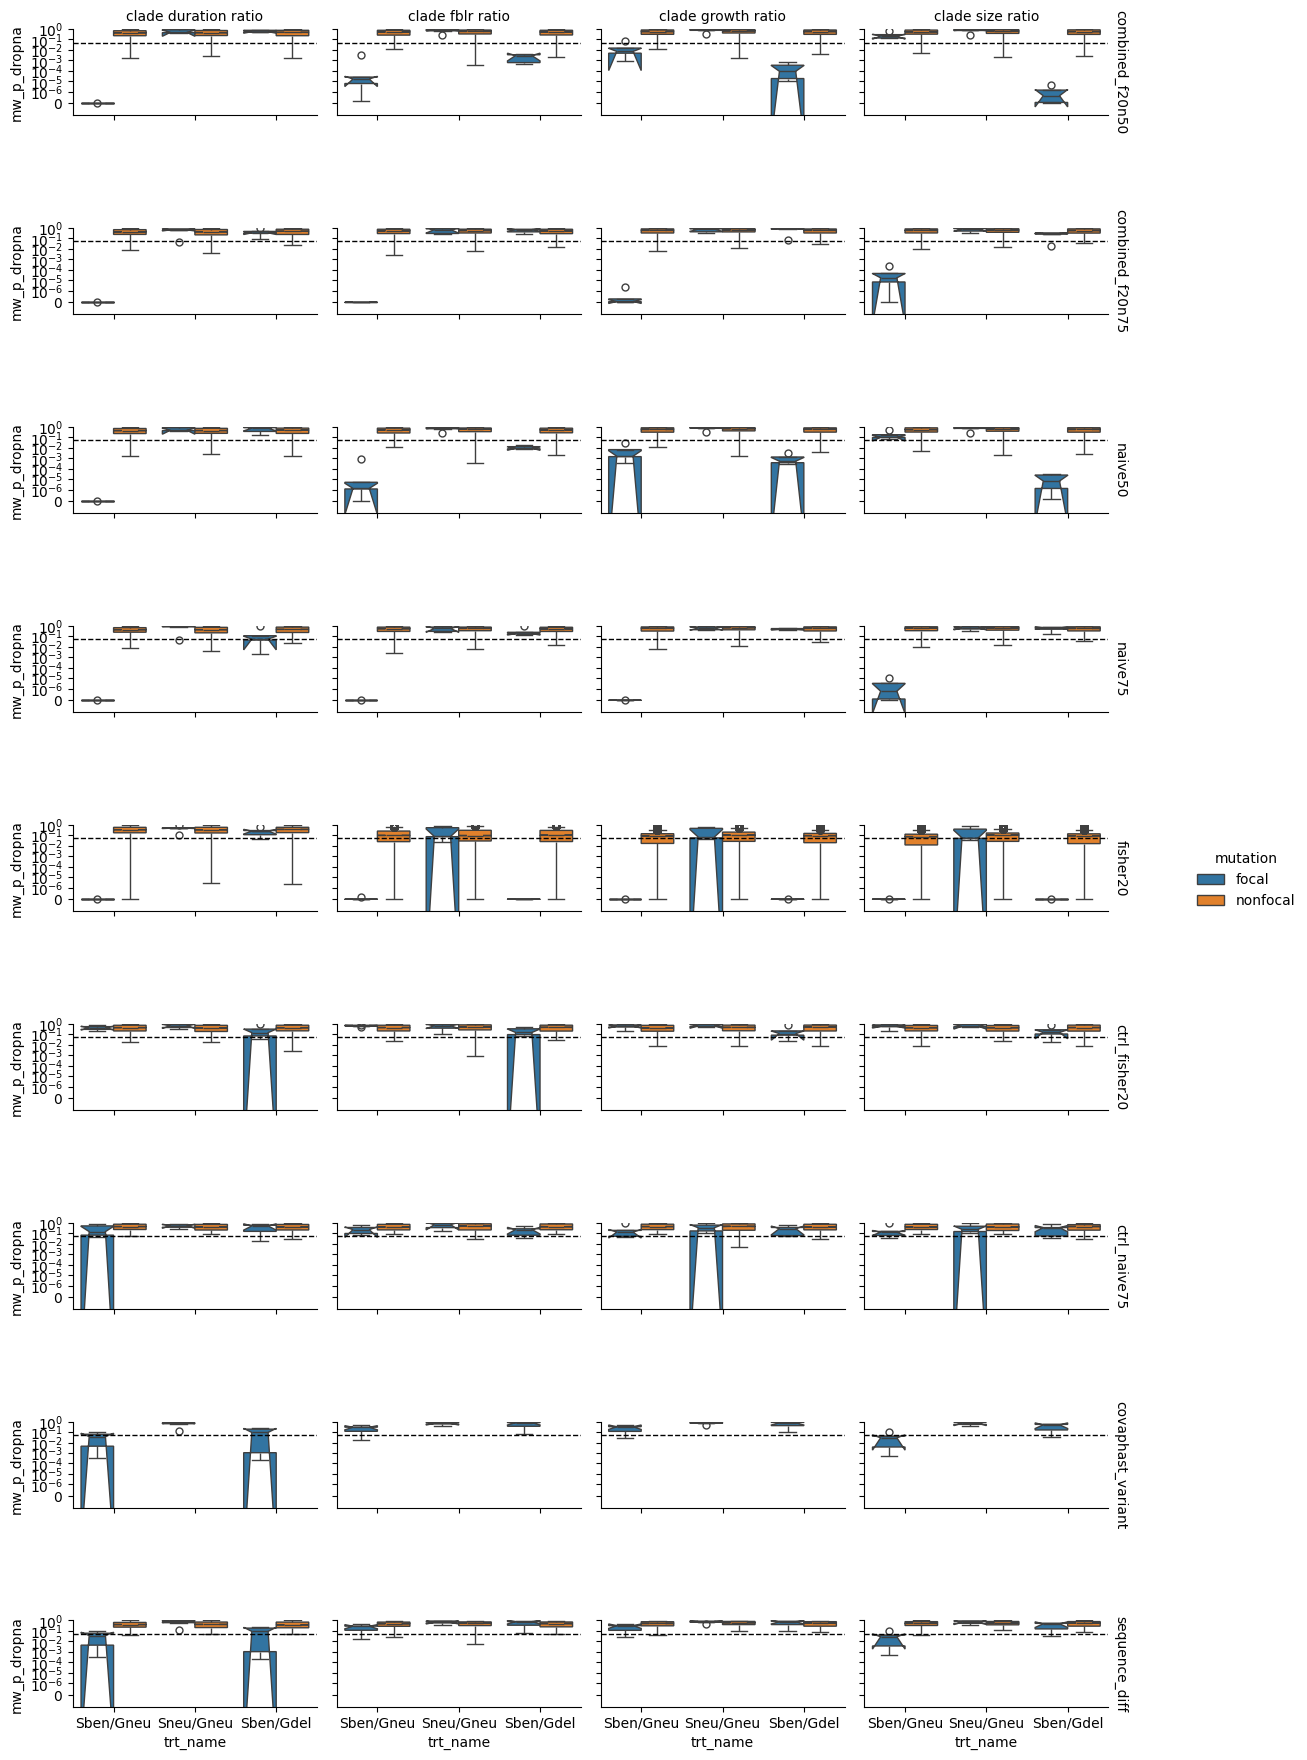

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


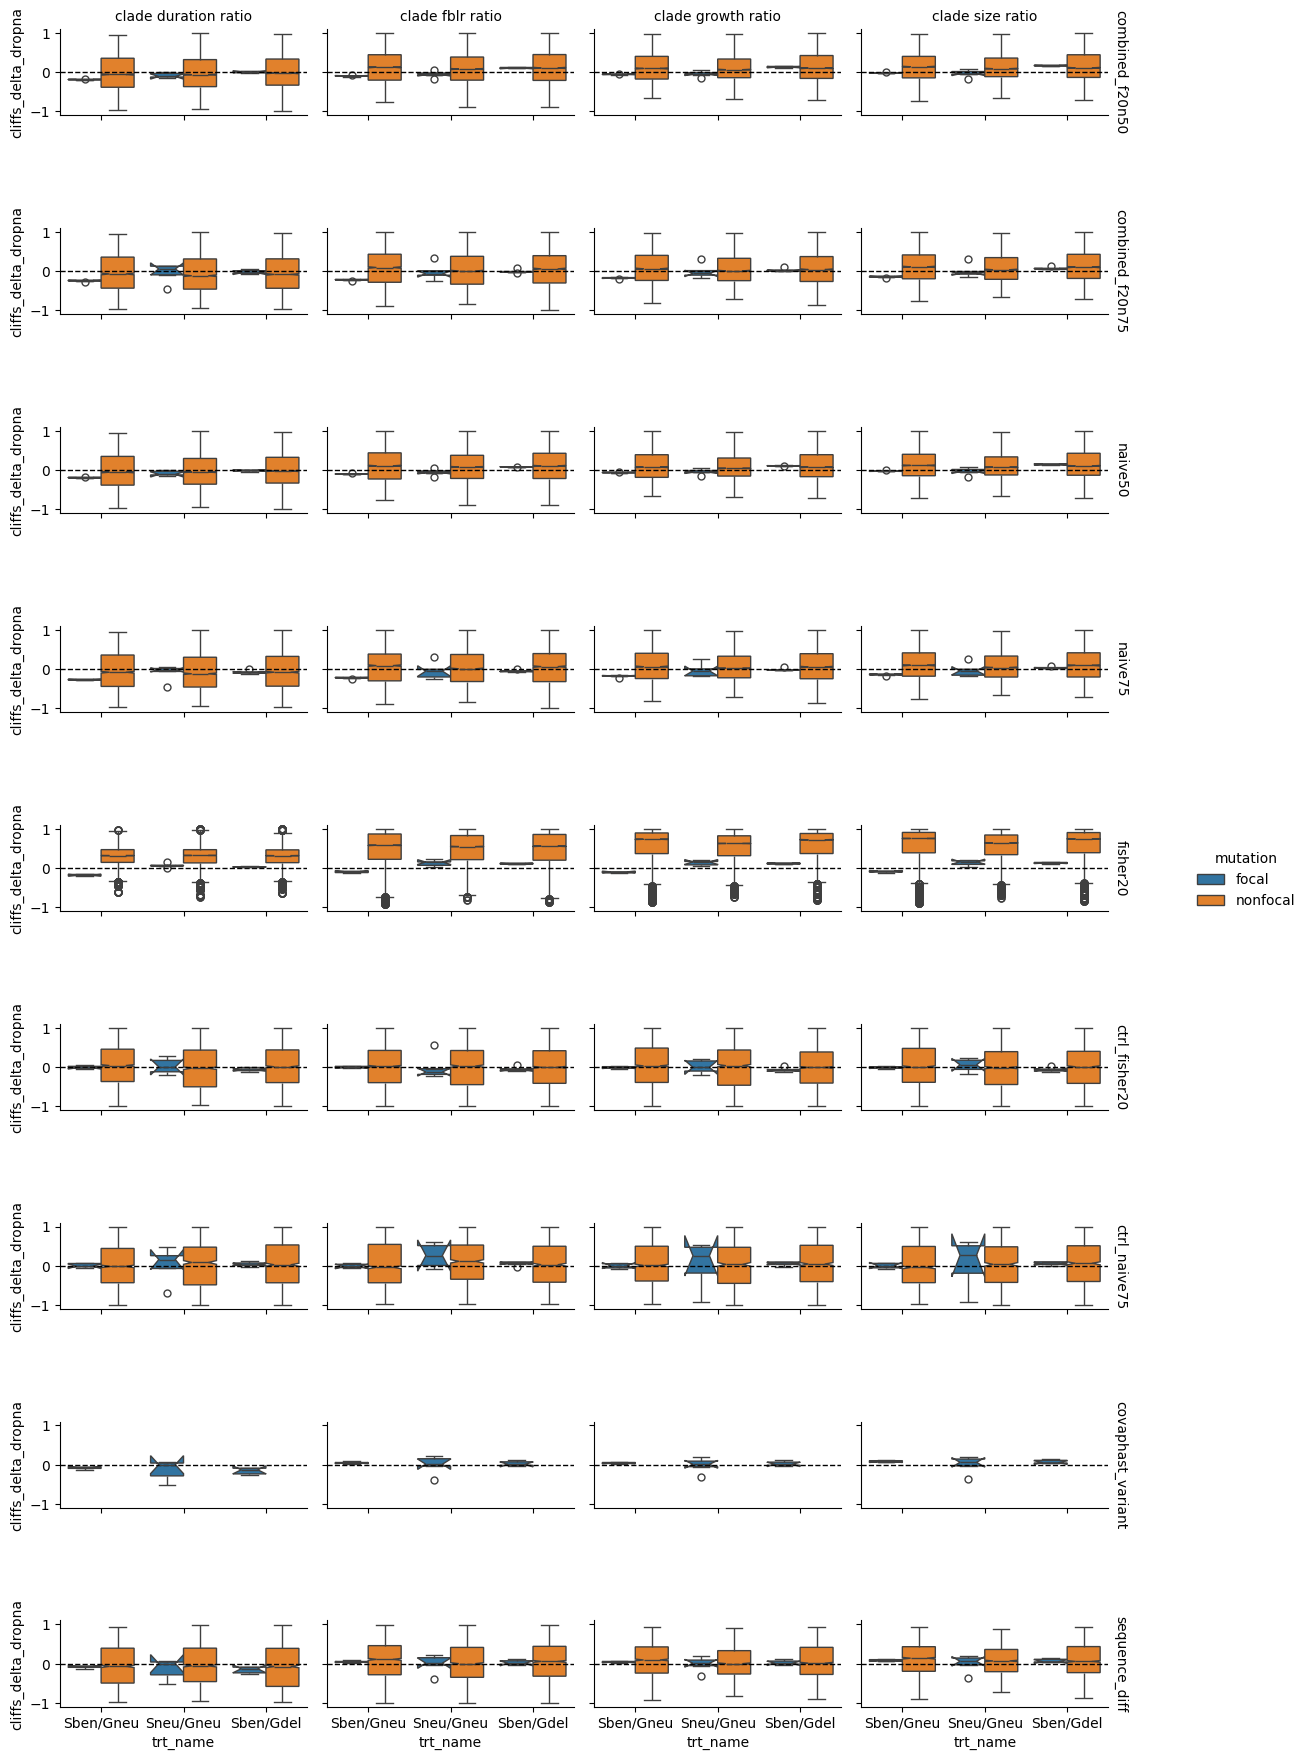

In [13]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            aspect=1.5,
            height=2,
            notch=True,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [14]:
stats = (
    "screened_nanmax",
    "screened_nanmean",
    "screened_nanmedian",
    "mut_nobs",
    "binom_n",
    "beq_nanmax",
    "beq_nanmean",
    "screened_frac0",
    "screened_frac1",
    "screened_frac2",
    "screened_frac3",
)


In [15]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"] == "num_leaves")
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=100, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 270/270 [00:02<00:00, 117.96it/s]


In [16]:
data = pd.DataFrame(records)


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.png


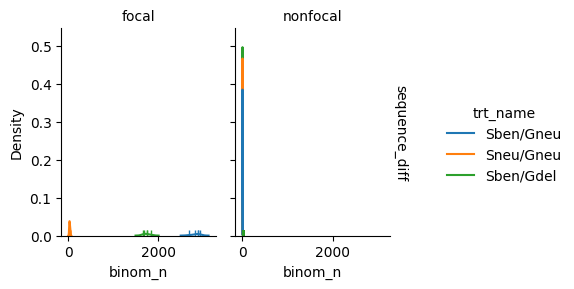

In [17]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="binom_n",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        # log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.png


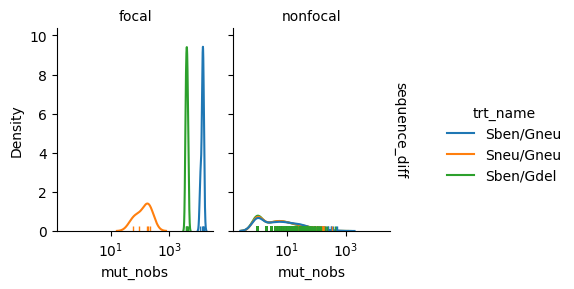

In [18]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="mut_nobs",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


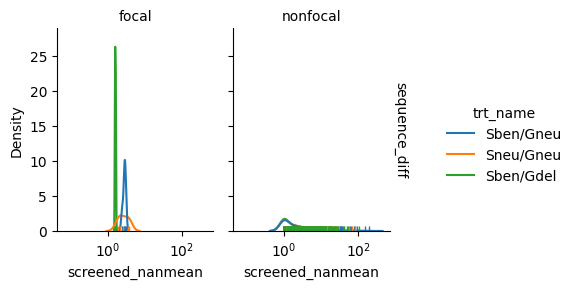

In [19]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.png


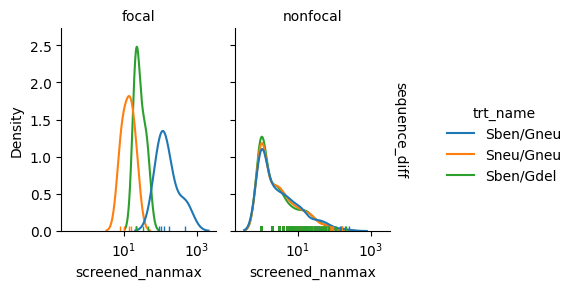

In [20]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.png


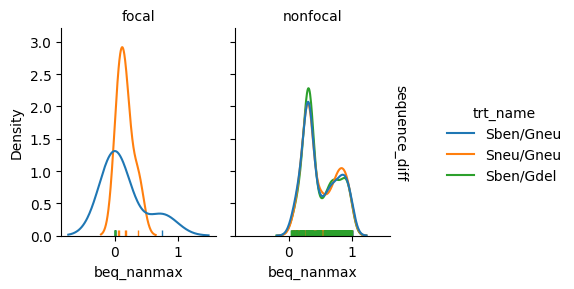

In [21]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.png


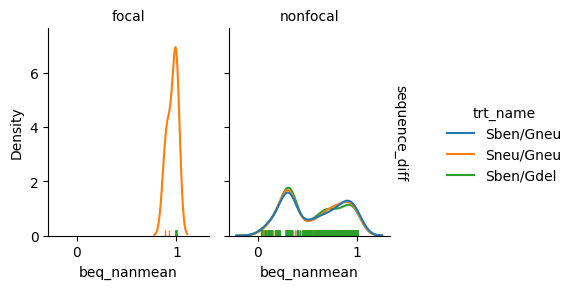

In [22]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


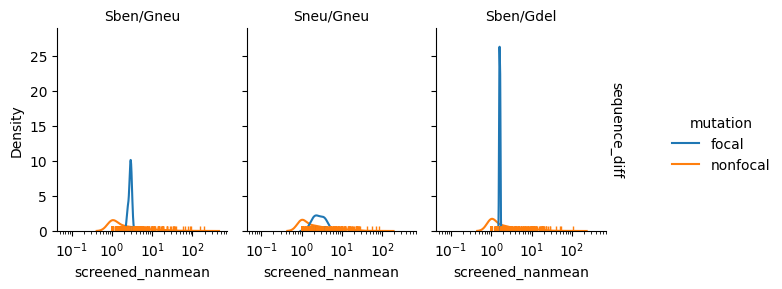

In [23]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.png


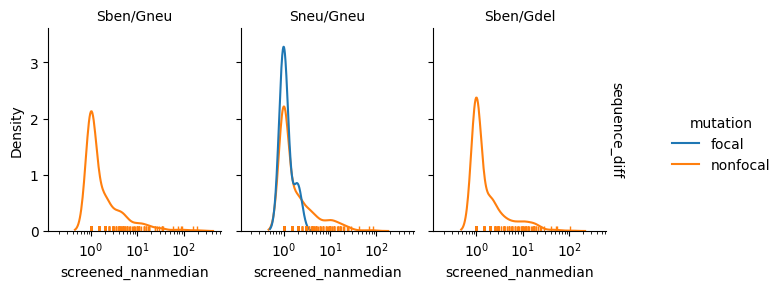

In [24]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmedian",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.png


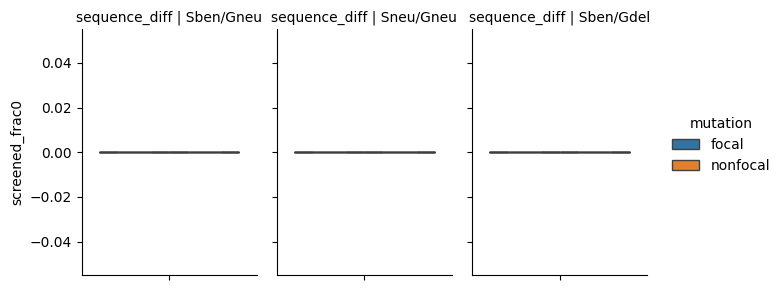

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.png


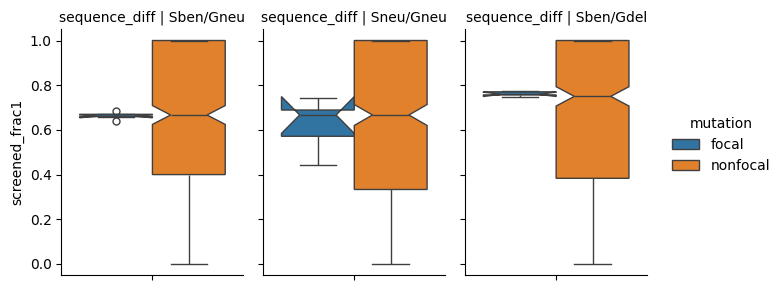

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.png


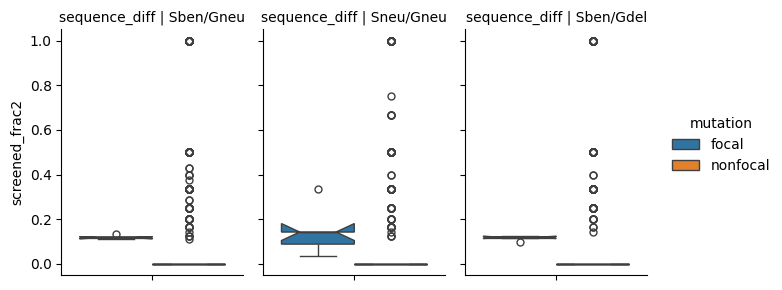

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.png


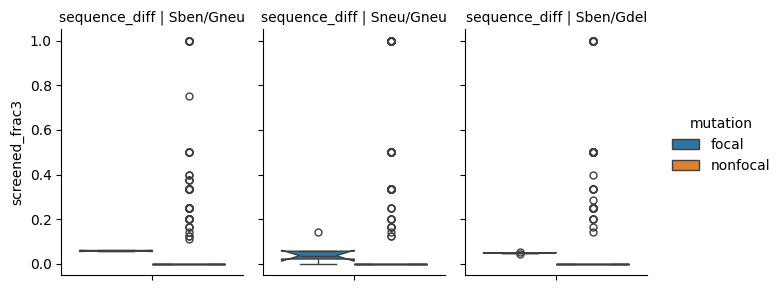

In [25]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for n in range(4):
        display(HTML(f"<h3>{min_leaves=} {n=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp[
                (grp["tb_stat"] == "num_leaves")
                & (grp["screen_name"] == "sequence_diff")
            ],
            y=f"screened_frac{n}",
            hue="mutation",
            row="screen_name",
            col="trt_name",
            kind="box",
            notch=True,
            aspect=0.75,
            height=3,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.tight_layout()
    break


In [26]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
97922      13980  0.164364     2515     1677  0.000000e+00  0.000000e+00   
384538     13237  0.156003     1813      640  2.512255e-36  5.555507e-19   
579682     11315  0.133172     4702     3984  0.000000e+00  0.000000e+00   
97926      13980  0.164364      637      318  1.000000e+00  8.168792e-01   
677336      8701  0.104059    46084    25765  0.000000e+00  0.000000e+00   
614063      7093  0.084476      221      106  5.905821e-01  2.015238e-01   
614103      7093  0.084476    21414    10707  1.000000e+00           NaN   
644141     14481  0.171138      698      434  1.293835e-10  3.304421e-19   
130722      8335  0.099161     1218      452  1.907542e-19  1.467665e-34   
97899      13980  0.164364      296      197  1.278722e-08  2.060453e-06   
354178      8113  0.096439     4759     2115  1.837264e-14  4.267919e-20   
614090      7093  0.084476      459      125  4.759537e-23  1.263616e-37   
677366      8701  0.104059     2157     1075  8.972118e-01  8.511666e-01   
130693      8335  0.099161       86       34  6.615259e-02  3.311851e-02   
26         13356  0.156897     2515     1668  0.000000e+00  0.000000e+00   
677343      8701  0.104059     1381      646  1.785160e-02  2.645403e-04   
47         13356  0.156897      203       99  7.789881e-01  9.582466e-01   
384488     13237  0.156003      850      742  0.000000e+00  0.000000e+00   
97909      13980  0.164364      231      122  4.298590e-01  9.217944e-01   
97925      13980  0.164364      189       99  5.607400e-01  5.227835e-01   
29         13356  0.156897      203       99  7.789881e-01  6.776764e-01   
419319      8021  0.095658      499      225  3.154914e-02  1.289940e-02   
677313      8701  0.104059      147       64  1.373778e-01  7.313388e-02   
579685     11315  0.133172      401      276  3.426554e-14  2.629694e-09   
7          13356  0.156897      397      281  6.597541e-17  4.028446e-21   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
97922       clade size ratio        2554  Sben/Gneu             0   
384538      clade size ratio        2805  Sben/Gneu             0   
579682    clade growth ratio        4704  Sben/Gneu             0   
97926       clade size ratio         688  Sben/Gneu             0   
677336      clade fblr ratio       49401  Sben/Gneu             0   
614063      clade fblr ratio         231  Sben/Gneu             0   
614103      clade size ratio       23850  Sben/Gneu             0   
644141  clade duration ratio         712  Sben/Gneu             0   
130722    clade growth ratio        1263  Sben/Gneu             0   
97899     clade growth ratio         296  Sben/Gneu             0   
354178  clade duration ratio        7131  Sben/Gneu             0   
614090      clade size ratio         584  Sben/Gneu             0   
677366      clade size ratio        2855  Sben/Gneu             0   
130693  clade duration ratio         204  Sben/Gneu             0   
26          clade fblr ratio        2515  Sben/Gneu             0   
677343    clade growth ratio        1413  Sben/Gneu             0   
47        clade growth ratio         203  Sben/Gneu             0   
384488      clade fblr ratio         850  Sben/Gneu             0   
97909     clade growth ratio         231  Sben/Gneu             0   
97925       clade size ratio         200  Sben/Gneu             0   
29          clade fblr ratio         203  Sben/Gneu             0   
419319  clade duration ratio        1249  Sben/Gneu             0   
677313  clade duration ratio         335  Sben/Gneu             0   
579685    clade growth ratio         401  Sben/Gneu             0   
7       clade duration ratio         406  Sben/Gneu             0   

        screened_nanmean  
97922           0.872361  
384538         -0.364258  
579682          0.034437  
97926          -0.078528  
677336          0.003408  
614063         -0.001841  
614103          0.000000  
644141          0.24

In [27]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
384470     13237  0.156003      843      737  0.000000e+00  0.000000e+00   
97909      13980  0.164364      231      122  4.298590e-01  9.217944e-01   
384492     13237  0.156003     3190     2511  0.000000e+00  0.000000e+00   
97906      13980  0.164364      579      291  9.337679e-01  7.474638e-01   
644163     14481  0.171138      786      469  6.582742e-08  6.332667e-08   
97930      13980  0.164364     1711      596  1.613041e-36  1.300485e-17   
354227      8113  0.096439      224      111  9.467486e-01  8.586692e-01   
384514     13237  0.156003      630      306  4.982489e-01  8.440982e-01   
354180      8113  0.096439     1101      583  5.370684e-02  2.103456e-02   
97864      13980  0.164364     4358     3813  0.000000e+00  0.000000e+00   
644160     14481  0.171138      877      783  0.000000e+00  0.000000e+00   
579651     11315  0.133172     1958     1267  3.736268e-39  1.345527e-40   
419354      8021  0.095658     2705     1225  1.023002e-06  6.268200e-09   
130733      8335  0.099161      421      206  6.966619e-01  7.221356e-01   
677312      8701  0.104059     5107     2264  5.651134e-16  3.735475e-20   
354222      8113  0.096439      512      166  1.308727e-15  1.805465e-26   
644150     14481  0.171138      576      288  1.000000e+00  6.362537e-01   
644203     14481  0.171138     1999     1143  1.479464e-10  3.694670e-15   
97862      13980  0.164364      817      723  0.000000e+00  0.000000e+00   
614041      7093  0.084476      240       91  2.192937e-04  3.256706e-05   
32         13356  0.156897     2870     1622  3.120226e-12  3.322176e-07   
97876      13980  0.164364     2633     1597  6.292277e-28  0.000000e+00   
419346      8021  0.095658     1151      430  8.430693e-18  6.139402e-35   
614096      7093  0.084476     2214      998  3.924608e-06  1.995272e-08   
677327      8701  0.104059     1379      645  1.776880e-02  2.012690e-04   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
384470  clade duration ratio         850  Sben/Gneu             0   
97909     clade growth ratio         231  Sben/Gneu             0   
384492      clade fblr ratio        3191  Sben/Gneu             0   
97906     clade growth ratio         580  Sben/Gneu             0   
644163      clade fblr ratio         786  Sben/Gneu             0   
97930       clade size ratio        2690  Sben/Gneu             0   
354227      clade size ratio         283  Sben/Gneu             0   
384514    clade growth ratio         630  Sben/Gneu             0   
354180  clade duration ratio        2724  Sben/Gneu             0   
97864   clade duration ratio        4418  Sben/Gneu             0   
644160      clade fblr ratio         877  Sben/Gneu             0   
579651  clade duration ratio        2000  Sben/Gneu             0   
419354    clade growth ratio        2736  Sben/Gneu             0   
130733    clade growth ratio         426  Sben/Gneu             0   
677312  clade duration ratio        7602  Sben/Gneu             0   
354222      clade size ratio         647  Sben/Gneu             0   
644150  clade duration ratio         586  Sben/Gneu             0   
644203      clade size ratio        2057  Sben/Gneu             0   
97862   clade duration ratio         822  Sben/Gneu             0   
614041  clade duration ratio         578  Sben/Gneu             0   
32          clade fblr ratio        2870  Sben/Gneu             0   
97876   clade duration ratio        2690  Sben/Gneu             0   
419346    clade growth ratio        1180  Sben/Gneu             0   
614096      clade size ratio        2459  Sben/Gneu             0   
677327      clade fblr ratio        1413  Sben/Gneu             0   

        screened_nanmean  
384470               inf  
97909          -0.014836  
384492          0.015012  
97906           0.003455  
644163          0.005874  
97930          -0.353242  
354227          0.004019  
384514         -0.00

In [28]:
df.loc[
    (df["trt_name"] == "Sneu/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k   binom_p  mw_p_dropna  \
286356       185  0.002187       36       25  0.028817     0.539132   
34651         57  0.000677        1        1  1.000000     0.805524   
34673         57  0.000677        1        1  1.000000     0.682920   
322508       115  0.001376      110       56  0.924097     0.465815   
286376       185  0.002187       66       37  0.389052     0.890219   
286347       185  0.002187        6        2  0.687500     0.360144   
257107       128  0.001530        1        1  1.000000     0.535170   
937902       101  0.001205       90       36  0.072550     0.032016   
549069        59  0.000706        4        0  0.125000     0.070852   
904283       175  0.002063        3        0  0.250000     0.800003   
904243       175  0.002063        3        2  1.000000     0.988537   
34640         57  0.000677        7        3  1.000000     0.896681   
68364         39  0.000469        4        2  1.000000     0.528553   
904269       175  0.002063        8        4  1.000000     0.815408   
322550       115  0.001376    21375    12089  0.000000     0.000000   
514097        91  0.001076        6        5  0.218750     0.047576   
904260       175  0.002063        3        2  1.000000     0.894862   
937857       101  0.001205        0        0       NaN     1.000000   
904273       175  0.002063        8        4  1.000000     0.815408   
322545       115  0.001376       78       28  0.016853     0.001272   
68393         39  0.000469        2        1  1.000000     0.402649   
937898       101  0.001205       86       33  0.039854     0.075164   
257126       128  0.001530    20774    11658  0.000000     0.000000   
322532       115  0.001376       12        9  0.145996     0.106354   
68358         39  0.000469        2        1  1.000000     0.966165   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
286356    clade growth ratio          36  Sneu/Gneu             0   
34651       clade fblr ratio           1  Sneu/Gneu             0   
34673     clade growth ratio           1  Sneu/Gneu             0   
322508  clade duration ratio         174  Sneu/Gneu             0   
286376      clade size ratio          66  Sneu/Gneu             0   
286347      clade fblr ratio           6  Sneu/Gneu             0   
257107  clade duration ratio           7  Sneu/Gneu             0   
937902      clade size ratio          91  Sneu/Gneu             0   
549069      clade fblr ratio           4  Sneu/Gneu             0   
904283    clade growth ratio           3  Sneu/Gneu             0   
904243  clade duration ratio           3  Sneu/Gneu             0   
34640       clade fblr ratio           7  Sneu/Gneu             0   
68364       clade fblr ratio           4  Sneu/Gneu             0   
904269    clade growth ratio           8  Sneu/Gneu             0   
322550    clade growth ratio       21742  Sneu/Gneu             0   
514097  clade duration ratio           6  Sneu/Gneu             0   
904260      clade fblr ratio           3  Sneu/Gneu             0   
937857  clade duration ratio          10  Sneu/Gneu             0   
904273    clade growth ratio           8  Sneu/Gneu             0   
322545    clade growth ratio          78  Sneu/Gneu             0   
68393     clade growth ratio           2  Sneu/Gneu             0   
937898      clade size ratio         164  Sneu/Gneu             0   
257126      clade fblr ratio       21549  Sneu/Gneu             0   
322532      clade fblr ratio          13  Sneu/Gneu             0   
68358   clade duration ratio           5  Sneu/Gneu             0   

        screened_nanmean  
286356          0.013090  
34651           0.006858  
34673           0.021928  
322508               NaN  
286376         -0.165415  
286347         -0.012541  
257107          0.022022  
937902         -0.211344  
549069         -0.014143  
904283         -0.005992  
904243          0.002797  
34640          -0.001492  
68364          